<a href="https://colab.research.google.com/github/fkay/Google_Colab/blob/main/Petz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de internação do SUS

# Exercicio 2
## a - alunos cursaram a disciplina de Banco de Dados em 2019 e 2020;


```
SELECT count(*) FROM
	historico as h JOIN disciplinas as d ON (h.cod_disc = d.cod_disc)
	WHERE d.nome_disc = 'Banco de Dados' AND (h.ano = 2019 OR h.ano = 2020);

```

## b - Monte uma consulta que exiba os nomes dos alunos que não foram reprovados em nenhuma disciplina (considere nota mínima igual a 6 para aprovação).
Considerando que o aluno que não reprovou em nenhum disciplina no histório terá a quantidade de disciplinas com nota maior ou igual a 6.0 igual a quantidade de notas presente no histórico. Foi considerado apenas alunos que tenham pelo menos uma nota no histórico.

```
SELECT a.nome FROM
	historico as h JOIN alunos as a ON (h.ra = a.ra)
GROUP BY a.nome HAVING COUNT(h.nota) = SUM(CASE WHEN h.nota >= 6.0 THEN 1 ELSE 0 END)
```




# Exercicio 1

## Ambiente
Foi utilizado o ambiente do Google Colab para elaboração do relatório e as análises. Será apresentado o relatório em conjunto com os códigos utilizados para as análises

### Preparação:
*   Subir arquivo no notebook usando o botão "Files"
*   Configurar a localização para converter a data (é necessário executar a célula que instala o pacote e reinicia o so (os.kill...)


## Parte 1
### Tratamentos dos dados
Os dados foram extraídos utilizando a biblioteca pandas e usando o recurso de leitura para planilhas exel. Foi verificada que cada planilha corresponde a um período de tempos, assim as planilhas foram combinadas em um dataframe utilizando o período como indice. Nas regiões e unidades da federação os dados estavam mistrurados, sendo a região a soma dos valores dos estados correspondentes.
Para deixar de uma forma mais clara, foram removidas as linhas com as regiões e totais e definida uma coluna para indicar a qual região pertence o estado, assim facilmente pode se obter os resultados somados agrupando pela região.
Para criar o indice com os períodos de medição, foi necessário instalar as ferramentas para português no ambiente do Colab, não foi a melhor solução pois é ncessário executar essa célula antes de executar as demais, pois senão pode gerar erros. Outra forma seria tratar as string dos meses e mapear os meses em português.
Avaliando os dados e conferindo o dicionário, percebe-se que algumas colunas são calculadas baseadas nas demais colunas e poderiam ser removidas do dados. Como a quantidade de dados não é grande optou-se por manter essas colunas e apenas selecionar as necessárias nas demais análises.

## Parte 2
### Análise de dados
Avaliando os dados percebe-se que a região Sudeste e seus estados tem os maiores valores para internação e Óbitos e os demais itens absolutos, isso deve estar relacionado ao fato de serem regiões mais populosas. No entanto a taxa de mortalidade já tem estados da região Sudeste, Sul e Nordeste nas três primeiras posições

O período presente na amostra vai do mês 12/2017 a 07/2019 mas percebe-se que existem vários gaps no período sem dados apresentados para esses meses faltantes.

Os valores para óbitos possui um desvio padrão grande o que leva a crer em grandes diferenças entre estados e períodos de tempo. No gráfico do total de óbitos não se percebe grandes variações que deve ser representada então por diferenças entre os estados. Isso pode ser verificado através dos gráficos de BoxPlot.

Os gráficos de internações e óbitos no total e para SP aparentam ter uma sazonalidade, além disso o total de internações apresenta leve tendencia de queda e o de óbito leve tendência de alta, mas no teste aumentado de Dickey Fuller para o total de internações, rejeitamos a hipótese nula com 95% de confiança e assim a série é estacionária. Nos testes posteriores a série de óbitos se mostrou não ser estacionária onde foi necessário fazer a primeira diferença.

## Parte 3
### Modelagem
### 3.1
Para completar os meses faltantes podemos usar a média entre os pontos adjacentes, o valor do ponto anterior ou do ponto posterior, ou interpolar entre os pontos. Esses métodos procuram completar os dados causando a menor interferência com relação aos resultados dos modelos que serão adotados.
### 3.2
Foi escolhido o método de interpolação para completar as medições para os meses faltantes.

### 3.3
O modelo escolhido para prever os dados dos próximos meses para o total de internações e valor médio de AIH foi o ARIMA baseado nas séries temporais. Conforme será mostrado nas partes subsequentes com os códigos e gráficos, foi primeiro usado o teste aumentado de Dickey Fuller para verificar estacionaridade das séries, depois verificado com os gráficos de autocorrelação e autocorrelação parciais para estimar os valores de p e q do modelo. Foram feitos alguns testes com o modelo e utilizado aquele com o menor score AIC para estimar os próximos meses. Para a série de internações o teste ADF mostrou que a série é estacionária para a amostra então foi feito estimativa através do modelo ARMA. Com isso foi possível prever os valores para os próximos 6 meses.
Para a previsão do valor médio de AIH foi necessária fazer uma diferenciação com defasagem, provável que exista sazionalidade na séríe. Feito isso foi possível através do mesmo processo anterior estimar o modelo ARMA e prever os valores.
Para o modelo de Óbitos optou-se usar um modelo VAR, relacionando os Óbitos e as internações. Foi possível demonstrar através dos testes que internações causa Grange óbitos. Foram feitos todos os testes necessários e verificações nas séries para que atendessem os requerimentos do modelo, que depois foi aplicado para prever os próximos meses de óbitos.
Os modelos usados foram baseados em séries de tempo, assim utilizou-se os valores passados para estimar os valores futuros.

## Parte 4
Os dados podem ajudar a planejar os aumentos de internação podendo dessa forma o estado se precaver e antecipar determinadas ações para mitigar esse aumento de volume. Além disso é provável que com um período de observações apareça no modelo períodos sazonais ou ciclicos, ajudando assim o estado se preparar para esses períodos. Além disso podem ser elaborados estudos nessa época para coletar outros dados e verificar quais doenças estão causando o aumento de internações para que medidas preventivas possam ser tomadas.
Para o estado de SP, a mesma linha de pensamento se aplica, a pecularidade que por se tratar um estado mais populoso as quantidades medidas são bem maiores, mas com isso seria mais fácil conduzir determinados estudos pois poderia atingir amostras mais substancias.







# Códigos e gráficos
### Os trechos apresentados abaixo dão suporte para as análises apresentadas na primeira parte

In [ ]:
# biblioteca para verificar alguns insights sobre os dados
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.3 MB/s 


### Acerto das configurações de idioma para converte a data corretamente

In [ ]:
# See all currently installed locales
!locale -a

C
C.UTF-8
en_US.utf8
POSIX


In [ ]:
# instala as configuracoes para portugues
# apesar do erro gerado ele instala normalmente
import os

# Install es_MX
!/usr/share/locales/install-language-pack pt_BR
!dpkg-reconfigure locales

# Restart Python process to pick up the new locales
os.kill(os.getpid(), 9)

Generating locales (this might take a while)...
  pt_BR.ISO-8859-1... done
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.ISO-8859-1... done
Generation complete.


In [ ]:
# verifica local sendo usado
from datetime import datetime
import locale
print(locale.getlocale())

('en_US', 'UTF-8')


In [ ]:
# muda para português Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR')
print(locale.getlocale())

('pt_BR', 'ISO8859-1')


## Inicio da leitura dos dados e preparação dos dados para análises


### Leitura dos dados
Para isso o arquivo deve ser carregado na área de arquivos do Colab

In [ ]:
# importa as bibliotecas
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# le arquivo excel em um dicionario com os meses/ano como chaves
df = pd.read_excel("case_internacao_SUS.xls", sheet_name = None, header=0, index_col=0, na_values='-');

### Amostra dos dados

In [ ]:
# verifica como estão os dados
df['abr18'].head(5)

,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade
Região/Unidade da Federação,,,,,,,,,,,,,,,
Região Norte,83222.0,83237.0,70726089.02,54097731.05,329035.73,NaN,16141776.50,NaN,NaN,849.70,849.85,378341.0,4.5,2206.0,2.65
.. Rondônia,10290.0,10290.0,8871408.50,7110636.40,NaN,NaN,1760772.10,NaN,NaN,862.14,862.14,47175.0,4.6,286.0,2.78
.. Acre,4237.0,4252.0,3064163.42,2304187.62,NaN,NaN,759975.80,NaN,NaN,720.64,723.19,19446.0,4.6,97.0,2.29
.. Amazonas,15446.0,15446.0,14643340.51,11259660.49,NaN,NaN,3383680.02,NaN,NaN,948.03,948.03,79680.0,5.2,470.0,3.04
.. Roraima,3461.0,3461.0,2695484.62,1993425.02,NaN,NaN,702059.60,NaN,NaN,778.82,778.82,18636.0,5.4,93.0,2.69


### Preparação dos dados

In [ ]:
# cria dicionário de regiões
UF_regiao = {'Rondônia': 'Norte', 'Acre': 'Norte', 'Amazonas': 'Norte', 'Roraima': 'Norte', 'Pará': 'Norte', 'Amapá': 'Norte',
       'Tocantins': 'Norte', 'Maranhão': 'Nordeste', 'Piauí': 'Nordeste', 'Ceará': 'Nordeste', 'Rio Grande do Norte': 'Nordeste',
       'Paraíba': 'Nordeste', 'Pernambuco': 'Nordeste', 'Alagoas': 'Nordeste', 'Sergipe': 'Nordeste', 'Bahia': 'Nordeste',
       'Minas Gerais': 'Sudeste', 'Espírito Santo': 'Sudeste', 'Rio de Janeiro': 'Sudeste', 'São Paulo': 'Sudeste',
       'Paraná': 'Sul', 'Santa Catarina': 'Sul', 'Rio Grande do Sul': 'Sul',
       'Mato Grosso do Sul': 'Centro-Oeste' , 'Mato Grosso': 'Centro-Oeste', 'Goiás': 'Centro-Oeste', 'Distrito Federal': 'Centro-Oeste'}

In [ ]:
# cria indices nos DataFrames com os meses/ano dos dados
# remove linhas com Regiao e total pois são somas de outras linhas
# troca o nome da coluna "Região/Unidade da Federação" para "UF"
# cria indices usando tipo datetime
# cria coluna com região do estado
for key, da in df.items():
  data = da[da.index.notnull()].copy()
  data.reset_index(inplace = True)
  data.rename(columns = {'Região/Unidade da Federação': 'UF'}, inplace = True)
  data['UF'] = data['UF'].apply(lambda x: x.replace('.. ',''))
  data.drop(data[data['UF'].str.startswith('Região')].index, inplace = True)
  data.drop(data[data['UF'].str.startswith('Total')].index, inplace = True)
  data.drop(data[(data['UF'].str.strip() == '')].index, inplace = True)
  data["mes"] = datetime.strptime(key, '%b%y')
  data['Região'] = data['UF'].map(UF_regiao)
  data.set_index(['UF','mes'], inplace=True)
  df[key] = data

# verifica como ficaram os dados
df['abr18'].head()

,,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Região
UF,mes,,,,,,,,,,,,,,,,
Rondônia,2018-04-01,10290.0,10290.0,8871408.50,7110636.40,NaN,NaN,1760772.10,NaN,NaN,862.14,862.14,47175.0,4.6,286.0,2.78,Norte
Acre,2018-04-01,4237.0,4252.0,3064163.42,2304187.62,NaN,NaN,759975.80,NaN,NaN,720.64,723.19,19446.0,4.6,97.0,2.29,Norte
Amazonas,2018-04-01,15446.0,15446.0,14643340.51,11259660.49,NaN,NaN,3383680.02,NaN,NaN,948.03,948.03,79680.0,5.2,470.0,3.04,Norte
Roraima,2018-04-01,3461.0,3461.0,2695484.62,1993425.02,NaN,NaN,702059.60,NaN,NaN,778.82,778.82,18636.0,5.4,93.0,2.69,Norte
Pará,2018-04-01,41899.0,41899.0,35053278.80,26641870.71,290771.56,NaN,7984985.36,NaN,NaN,836.61,836.61,171709.0,4.1,996.0,2.38,Norte


In [ ]:
# agrupa os dataframes de cada período formando apenas um
df2 = df['dez17']
for key,data in df.items():
  if(key != 'dez17'):
    df2 = df2.append(data)

In [ ]:
# verifica os tipos de dados
df2.dtypes

Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal    float64
Val_serv_hosp_-_compl_gestor     float64
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal    float64
Val_serv_prof_-_compl_gestor     float64
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
Região                            object
dtype: object

### Confirma estados presentes na amostra e periodos de medição

In [ ]:
# lista de estados presentes na amostra
df2.reset_index()['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
# Lista os indices de tempo presente na amostar
# assim é possível ver que entre 01/12/2017 a 01/07/2019 existem vários meses sem valores
df2.index.get_level_values('mes').unique().sort_values()

DatetimeIndex(['2017-12-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-04-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', name='mes', freq=None)

In [ ]:
# verificando serie temporal 'Internações'
df2.loc['São Paulo']['Internações']

mes
2017-12-01    198083.0
2019-07-01    214299.0
2019-06-01    209812.0
2018-03-01    211205.0
2019-04-01    215787.0
2018-04-01    210204.0
2018-05-01    212696.0
2018-07-01    207804.0
2018-08-01    212547.0
2018-09-01    203113.0
2018-11-01    201634.0
2018-12-01    197493.0
2019-01-01    205741.0
2019-02-01    197813.0
Name: Internações, dtype: float64

### Verificação de algumas estatisticas

In [ ]:
# resumo dos valores presentes para cada variável
df2.describe()

,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade
count,377.000000,377.000000,3.770000e+02,3.770000e+02,2.510000e+02,7.200000e+01,3.770000e+02,7.200000e+01,62.000000,377.000000,377.00000,3.770000e+02,377.000000,377.000000,377.000000
mean,36730.122016,37290.427056,4.728991e+07,3.757668e+07,3.151708e+05,6.826638e+04,9.363297e+06,6.826638e+04,59085.561774,1126.888355,1139.46695,1.947894e+05,5.226790,1570.466844,3.813342
std,41822.122604,42871.755242,6.055944e+07,4.849190e+07,4.866291e+05,1.406303e+05,1.149594e+07,1.406303e+05,97405.847302,255.744835,263.34933,2.330465e+05,0.708008,2134.879844,1.014002
min,2493.000000,2493.000000,1.716856e+06,1.220961e+06,2.000500e+02,1.104000e+02,4.516617e+05,1.104000e+02,325.690000,622.210000,622.21000,1.264800e+04,4.000000,71.000000,2.020000
25%,13815.000000,14031.000000,1.481311e+07,1.176024e+07,3.679415e+04,2.287888e+04,3.205745e+06,2.287888e+04,7823.082500,918.580000,919.66000,6.690600e+04,4.700000,467.000000,3.160000
50%,18548.000000,18692.000000,2.165239e+07,1.699098e+07,1.094796e+05,5.160328e+04,4.628713e+06,5.160328e+04,17358.355000,1139.840000,1157.55000,9.553200e+04,5.100000,697.000000,3.720000
75%,45745.000000,46197.000000,6.464837e+07,5.094438e+07,3.988552e+05,7.954521e+04,1.328350e+07,7.954521e+04,55391.800000,1339.320000,1370.80000,2.519600e+05,5.600000,1991.000000,4.320000
max,215787.000000,221589.000000,3.043141e+08,2.437889e+08,3.225164e+06,1.196505e+06,5.773565e+07,1.196505e+06,618387.200000,1691.840000,1725.63000,1.192857e+06,8.000000,11988.000000,7.430000


In [ ]:
# resumos do principais valores de interesse
df2[['Internações', 'Valor_total', 'Valor_médio_AIH', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade']].describe()

,Internações,Valor_total,Valor_médio_AIH,Média_permanência,Óbitos,Taxa_mortalidade
count,377.000000,3.770000e+02,377.000000,377.000000,377.000000,377.000000
mean,36730.122016,4.728991e+07,1126.888355,5.226790,1570.466844,3.813342
std,41822.122604,6.055944e+07,255.744835,0.708008,2134.879844,1.014002
min,2493.000000,1.716856e+06,622.210000,4.000000,71.000000,2.020000
25%,13815.000000,1.481311e+07,918.580000,4.700000,467.000000,3.160000
50%,18548.000000,2.165239e+07,1139.840000,5.100000,697.000000,3.720000
75%,45745.000000,6.464837e+07,1339.320000,5.600000,1991.000000,4.320000
max,215787.000000,3.043141e+08,1691.840000,8.000000,11988.000000,7.430000


In [ ]:
# classificaçào por média de internações
df2.groupby('UF')['Internações'].mean().sort_values(ascending=False)

UF
São Paulo              207016.500000
Minas Gerais           104492.428571
Paraná                  72709.214286
Bahia                   68323.928571
Rio Grande do Sul       62475.214286
Rio de Janeiro          58824.857143
Pernambuco              47048.714286
Ceará                   41898.357143
Santa Catarina          41186.500000
Pará                    40290.285714
Maranhão                38085.071429
Goiás                   27337.214286
Espírito Santo          20028.357143
Distrito Federal        18156.571429
Piauí                   17855.214286
Mato Grosso             15692.285714
Amazonas                15605.071429
Paraíba                 15406.928571
Rio Grande do Norte     14600.500000
Alagoas                 14321.571429
Mato Grosso do Sul      14128.571429
Rondônia                 9884.071429
Sergipe                  7831.071429
Tocantins                5862.285714
Roraima                  3546.428571
Acre                     3519.076923
Amapá                    3214.78571

In [ ]:
# classificaçào por média de óbitos
df2.groupby('UF')['Óbitos'].mean().sort_values(ascending=False)

UF
São Paulo              10445.428571
Minas Gerais            4794.428571
Rio de Janeiro          4015.285714
Rio Grande do Sul       3220.500000
Paraná                  2754.928571
Bahia                   2474.214286
Pernambuco              2016.357143
Santa Catarina          1698.500000
Ceará                   1618.142857
Pará                     964.928571
Goiás                    948.285714
Maranhão                 889.214286
Espírito Santo           737.785714
Paraíba                  729.785714
Mato Grosso              586.500000
Rio Grande do Norte      560.571429
Distrito Federal         551.142857
Mato Grosso do Sul       537.000000
Alagoas                  535.571429
Piauí                    523.857143
Amazonas                 490.928571
Sergipe                  401.928571
Rondônia                 283.785714
Tocantins                197.000000
Acre                     121.384615
Roraima                  112.285714
Amapá                     89.357143
Name: Óbitos, dtype: floa

In [ ]:
# classificação pela taxa de mortalidade
df2.groupby('UF')['Taxa_mortalidade'].mean().sort_values(ascending=False)

UF
Rio de Janeiro         6.819286
Rio Grande do Sul      5.147143
Sergipe                5.124286
São Paulo              5.044286
Paraíba                4.733571
Minas Gerais           4.585714
Pernambuco             4.285714
Santa Catarina         4.118571
Ceará                  3.862143
Rio Grande do Norte    3.839286
Mato Grosso do Sul     3.797857
Paraná                 3.787857
Alagoas                3.744286
Mato Grosso            3.735714
Espírito Santo         3.679286
Bahia                  3.618571
Acre                   3.489231
Goiás                  3.469286
Tocantins              3.352143
Roraima                3.167857
Amazonas               3.140714
Distrito Federal       3.028571
Piauí                  2.934286
Rondônia               2.871429
Amapá                  2.823571
Pará                   2.395714
Maranhão               2.340714
Name: Taxa_mortalidade, dtype: float64

In [ ]:
# Verificando variáveis presentes
df2.reset_index().count()

UF                               377
mes                              377
Internações                      377
AIH_aprovadas                    377
Valor_total                      377
Valor_serviços_hospitalares      377
Val_serv_hosp_-_compl_federal    251
Val_serv_hosp_-_compl_gestor      72
Valor_serviços_profissionais     377
Val_serv_prof_-_compl_federal     72
Val_serv_prof_-_compl_gestor      62
Valor_médio_AIH                  377
Valor_médio_intern               377
Dias_permanência                 377
Média_permanência                377
Óbitos                           377
Taxa_mortalidade                 377
Região                           377
dtype: int64

Verificando natureza do desvio padrão alto para os óbitos

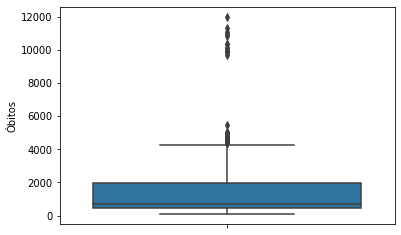

In [ ]:
sns.boxplot(y = df2['Óbitos'])
plt.show()

Executando o box plot parece possuir muitos outliers, mas são distorções entre as regiões, conforme o gráfico a seguir separado por região.

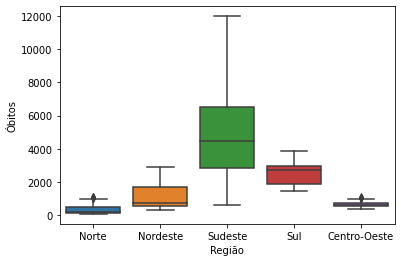

In [ ]:
sns.boxplot(data = df2, y = "Óbitos", x="Região")
plt.show()

### Usando a ferramenta SweetViz para explorar os principais dados.
Com essa ferramenta é possível verificar um resumo dos dados além disso também gera um gráfico de correlações. Pelo gráfico mostra clara correlação entre Internações, Valor Total e Óbitos. Existe correlação entre óbitos com o tempo médio de permanência e com o valor médio AIH, isso pode ser ao fato de que internações que levaram a óbito tendem a ter um maior tempo de permanência e deve gerar maiores custos na internação.

                                             |          | [  0%]   00:00 -> (? left)


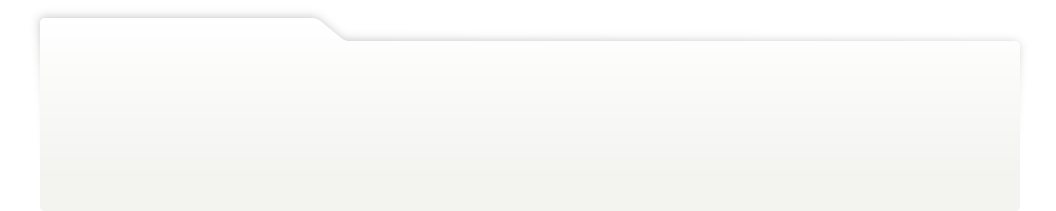
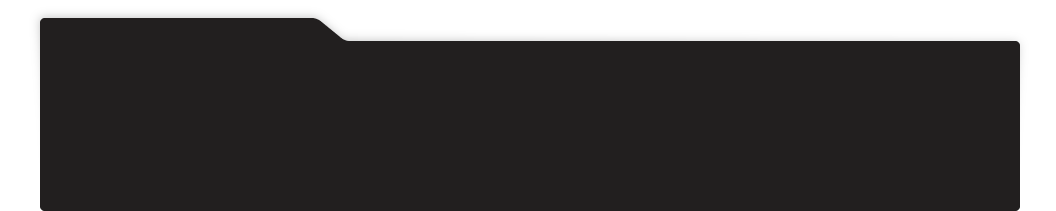
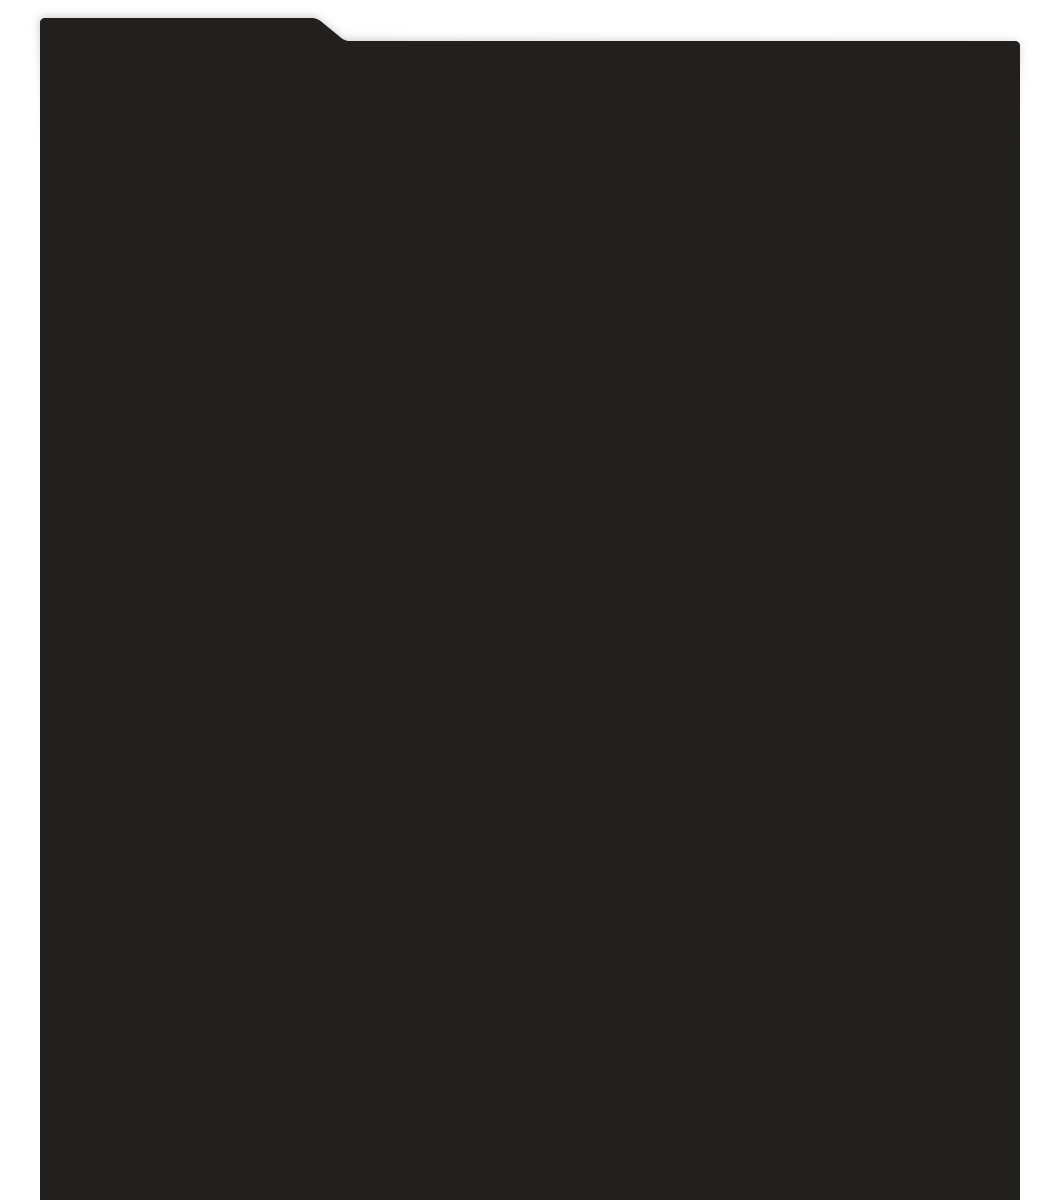
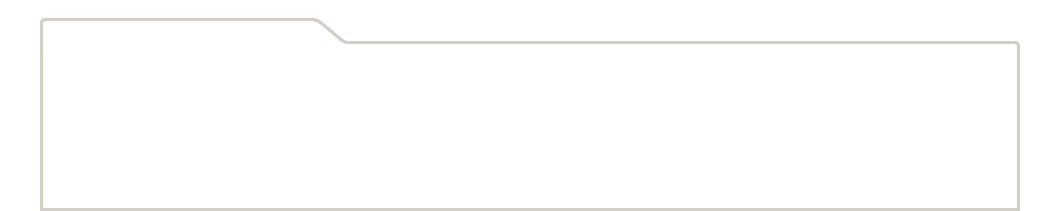
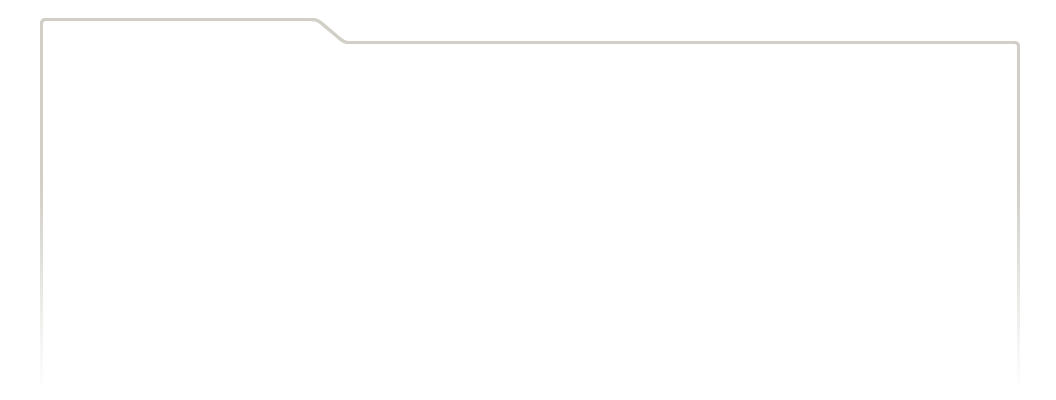
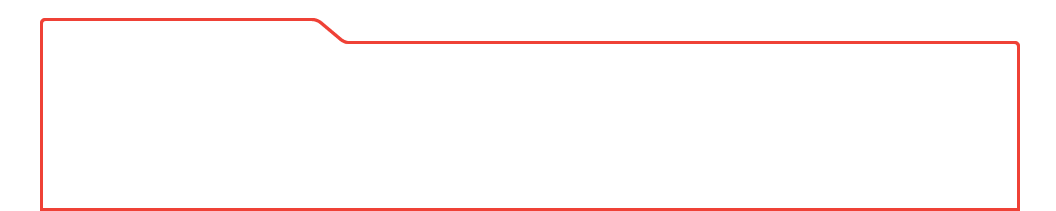
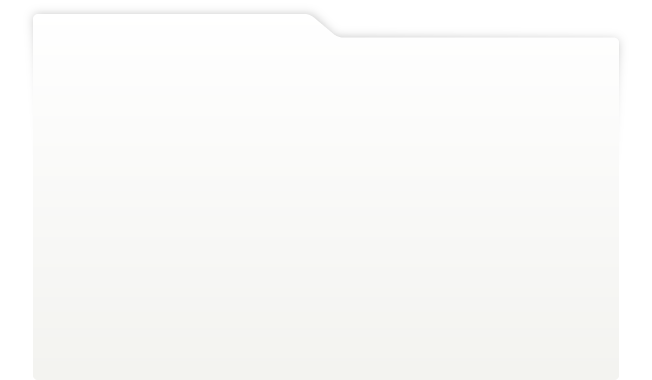
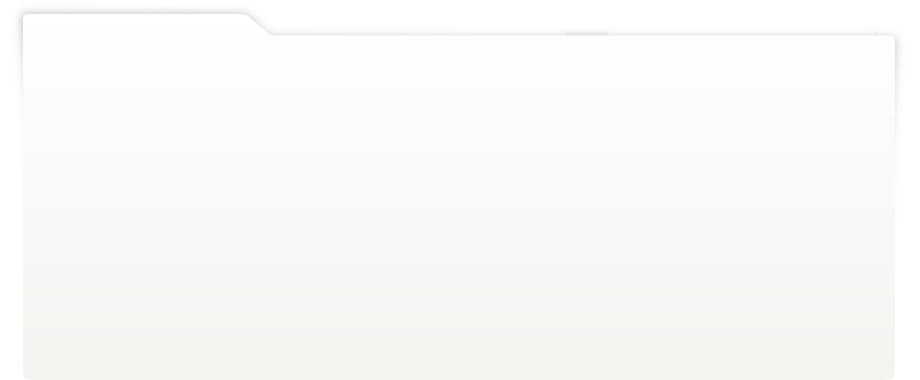
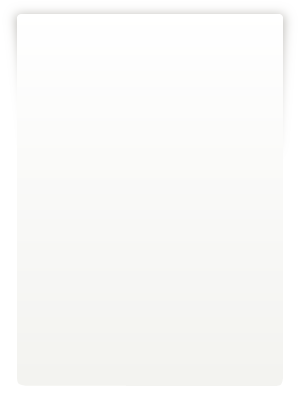
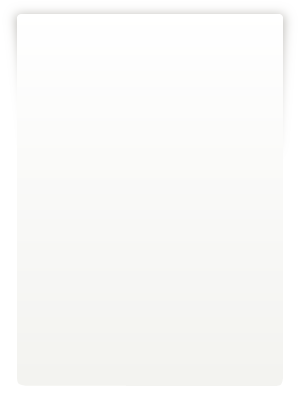
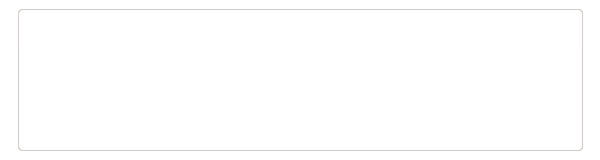
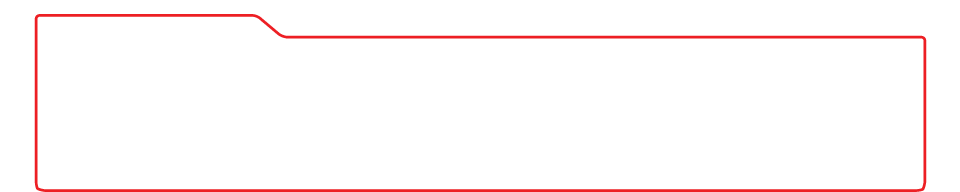
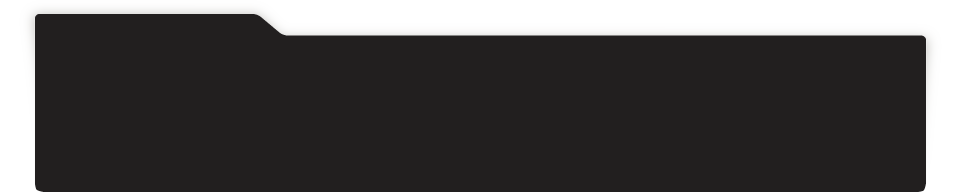
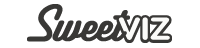
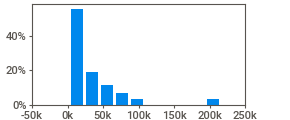
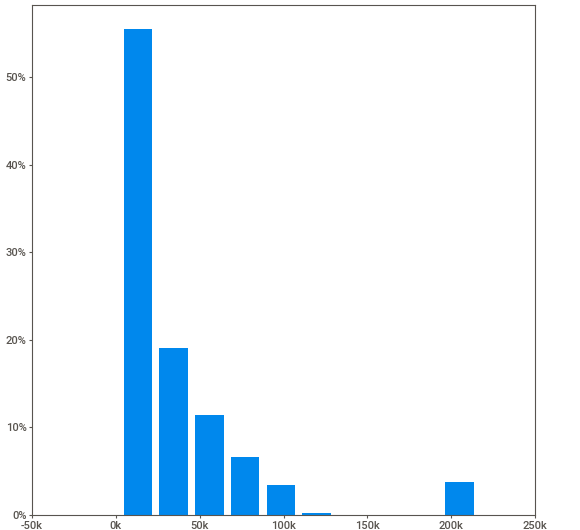
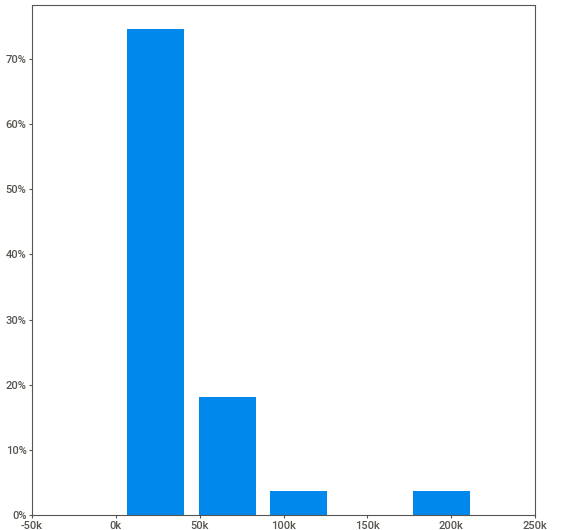
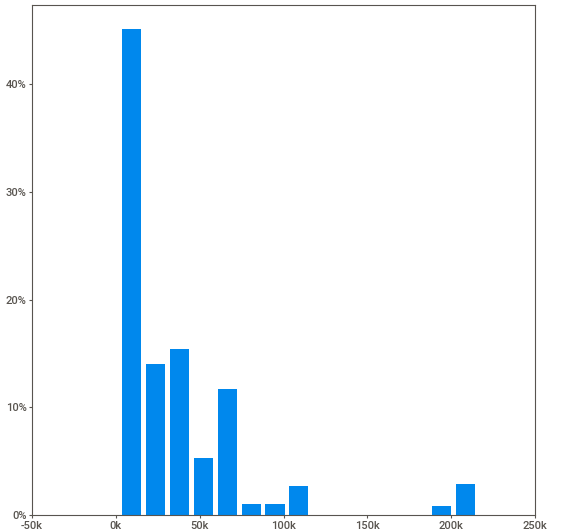
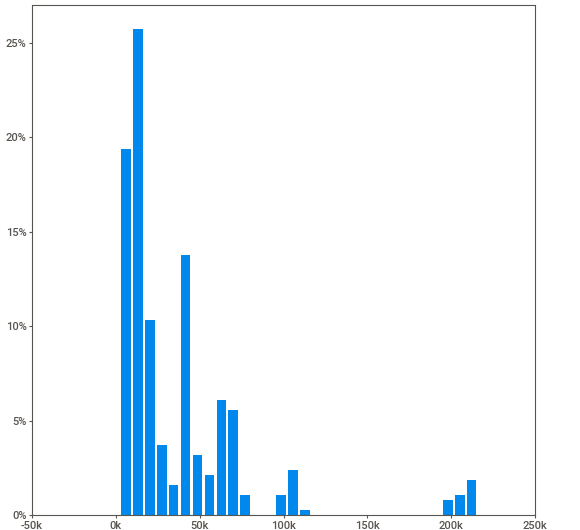
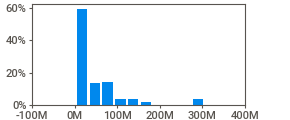
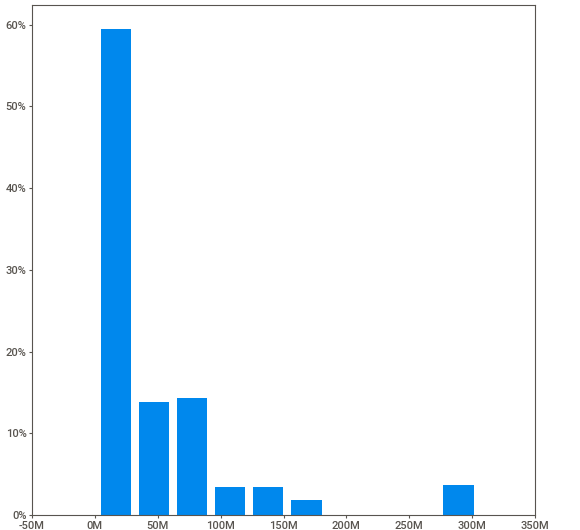
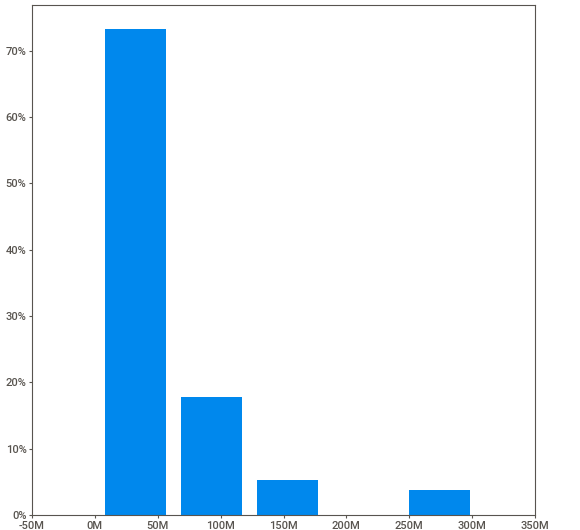
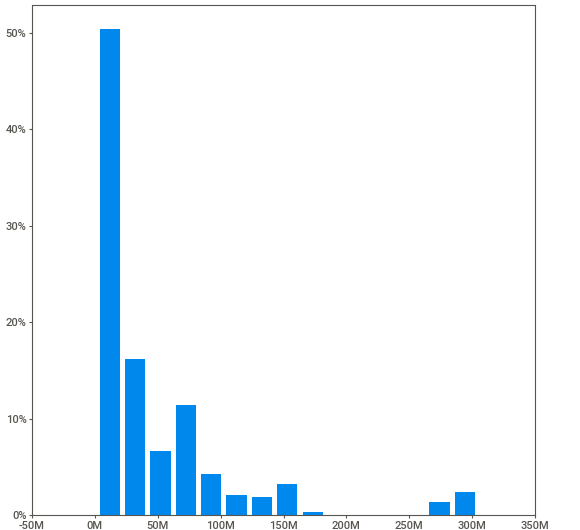
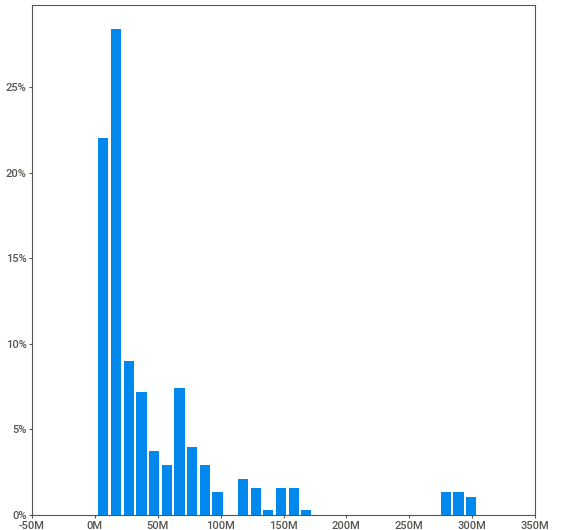
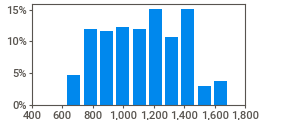
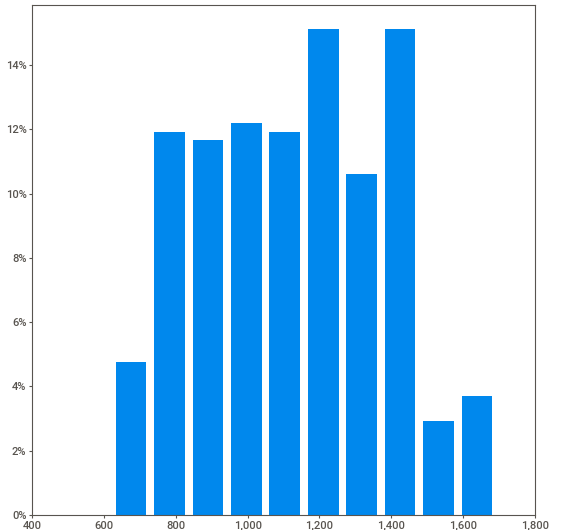
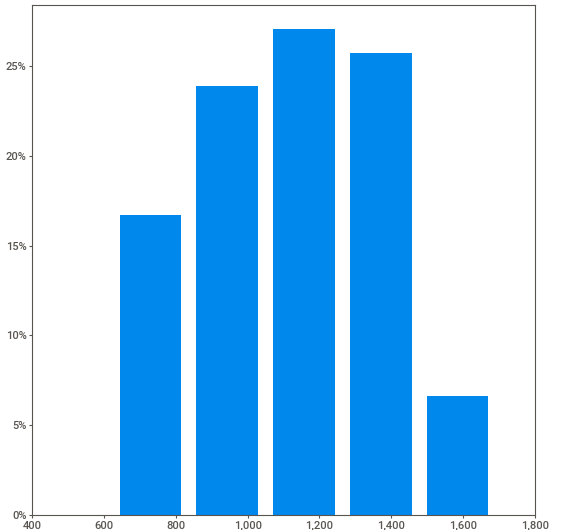
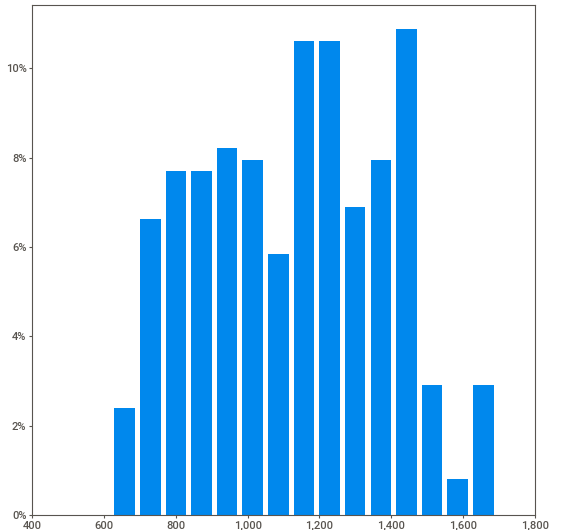
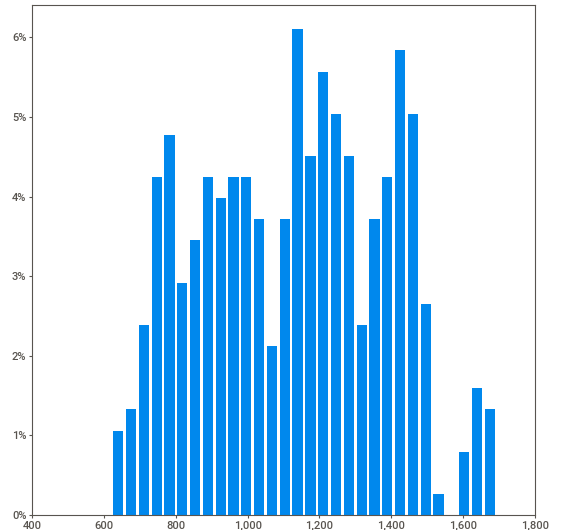
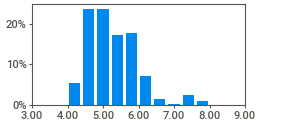
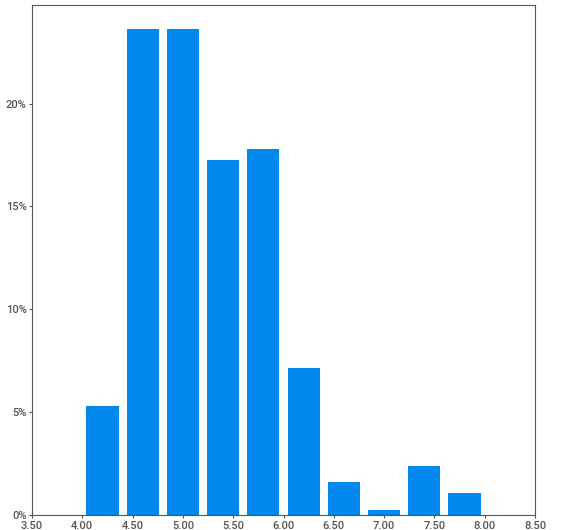
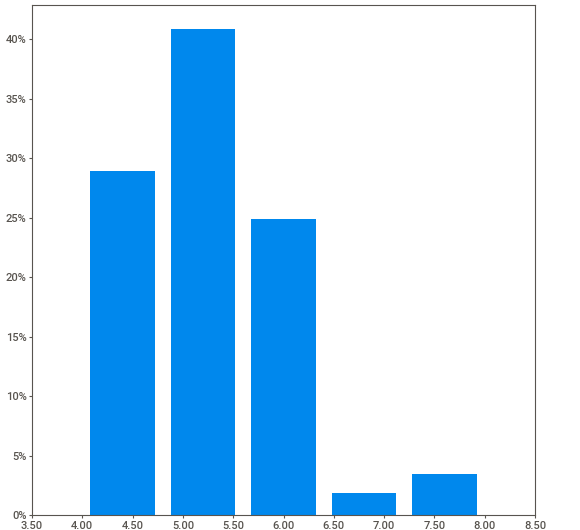
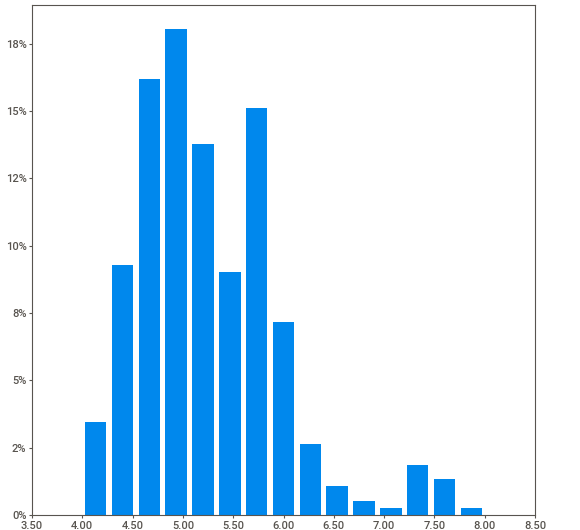
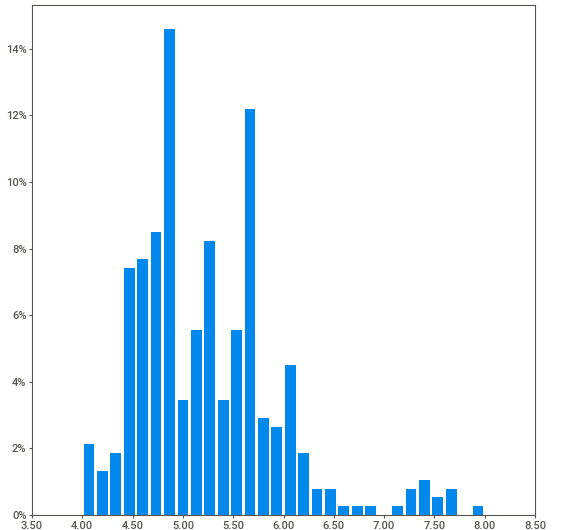
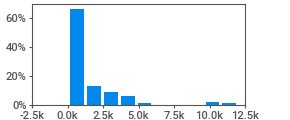
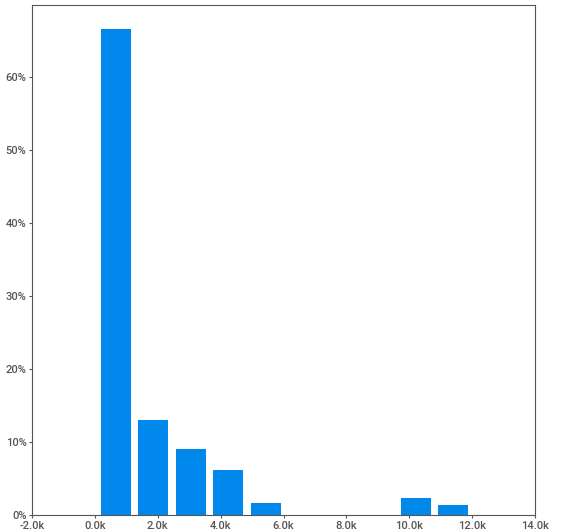
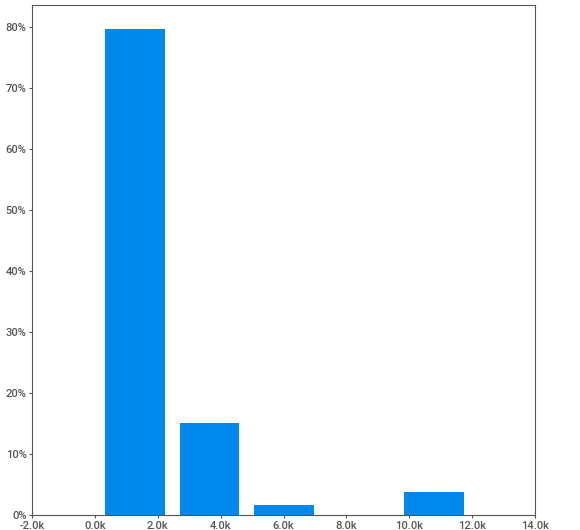
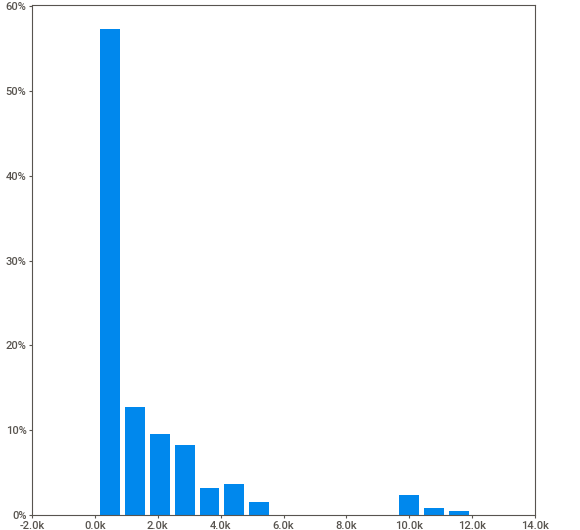
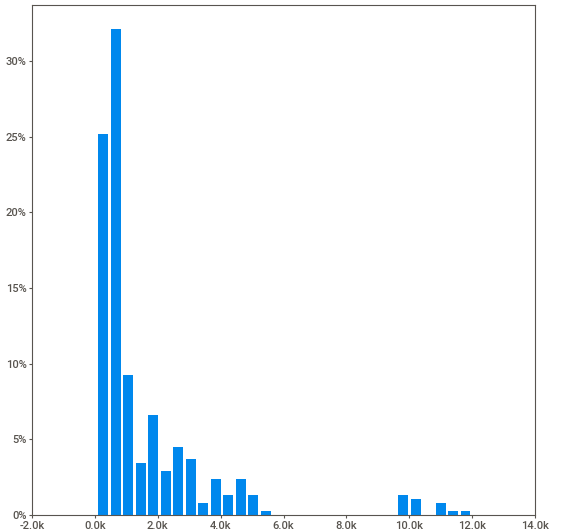
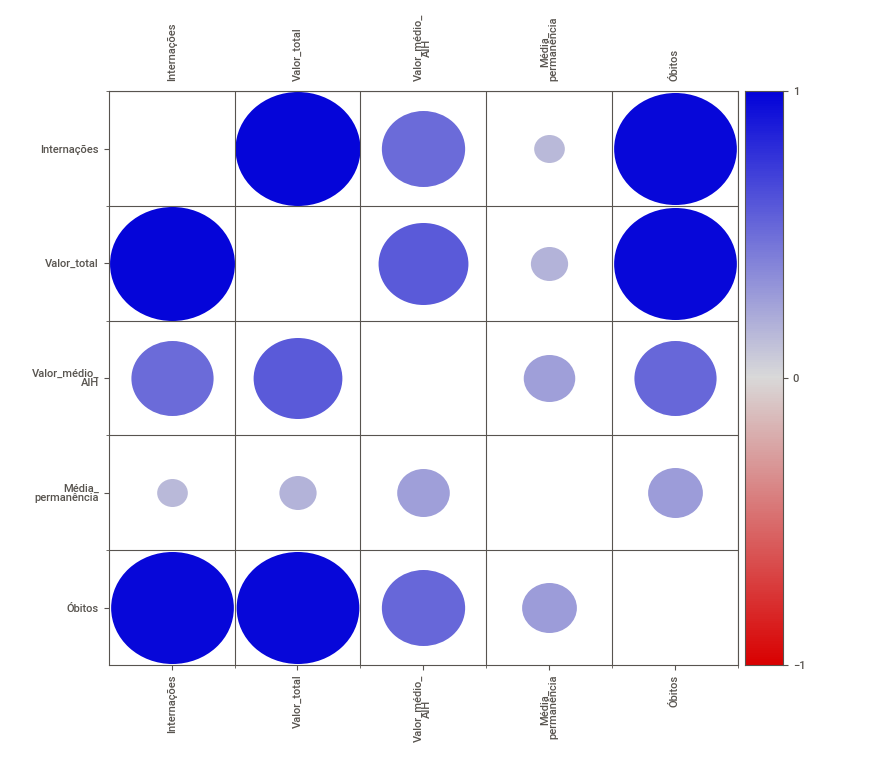
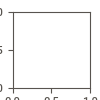

In [ ]:
import sweetviz as sv

colunas = ['Internações', 'Valor_total', 'Valor_médio_AIH', 'Média_permanência', 'Óbitos']

sv_analise = sv.analyze(df2[colunas])
sv_analise.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


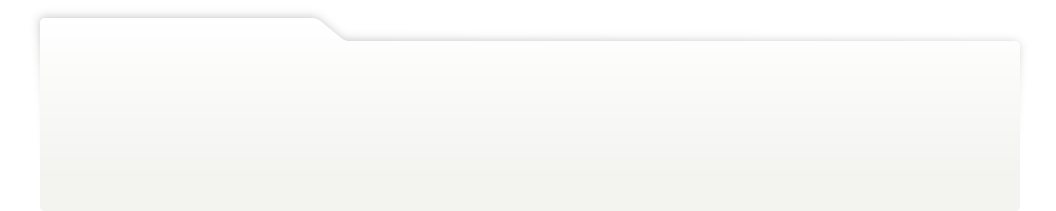
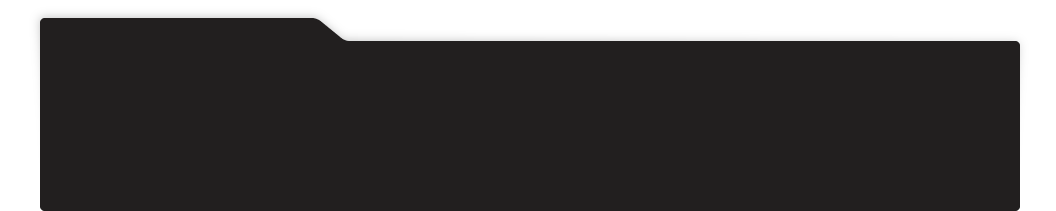
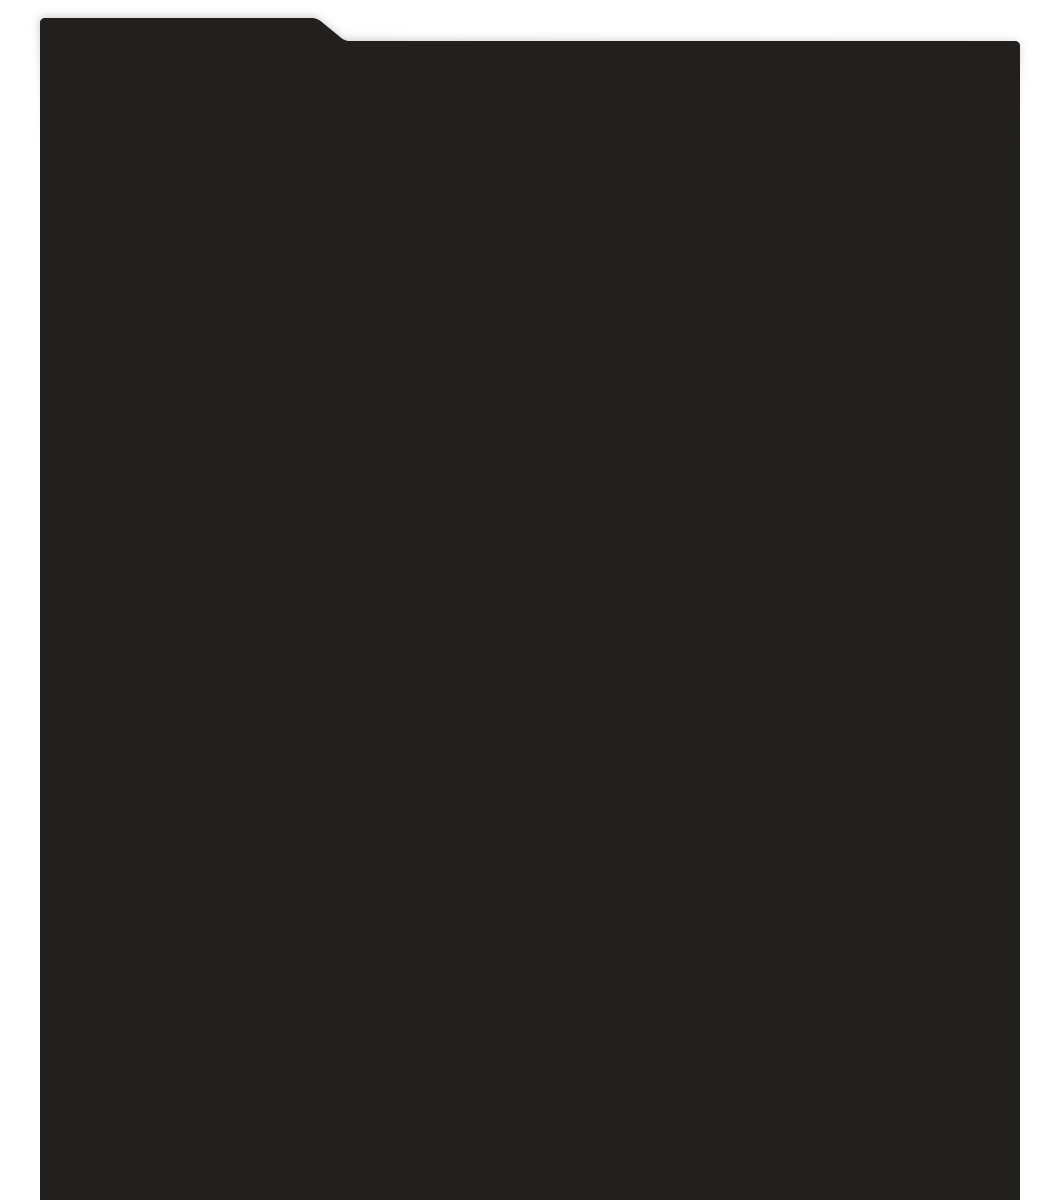
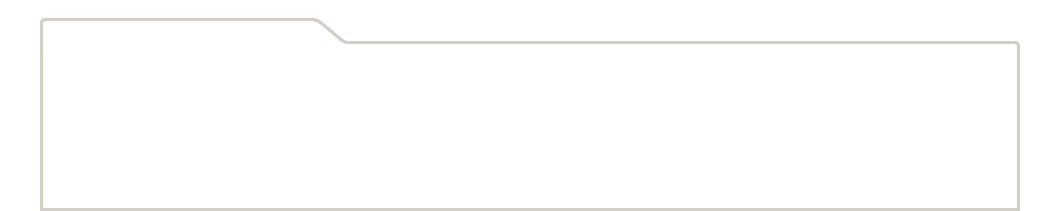
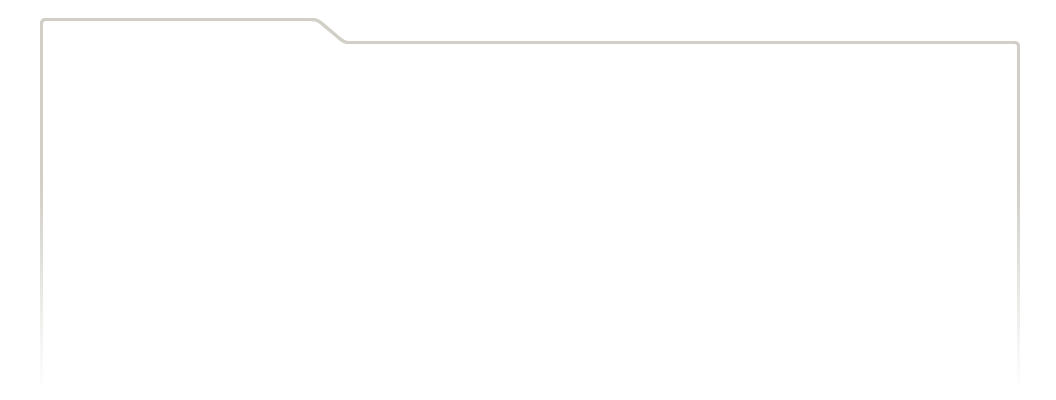
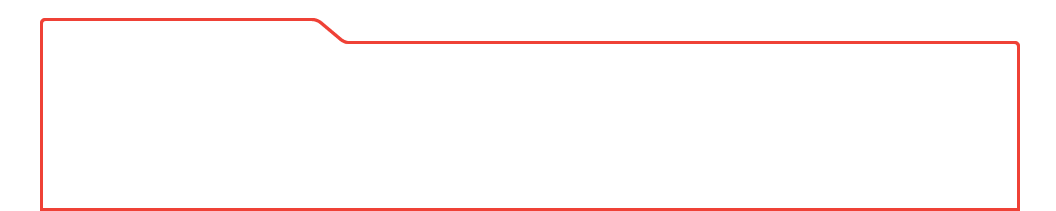
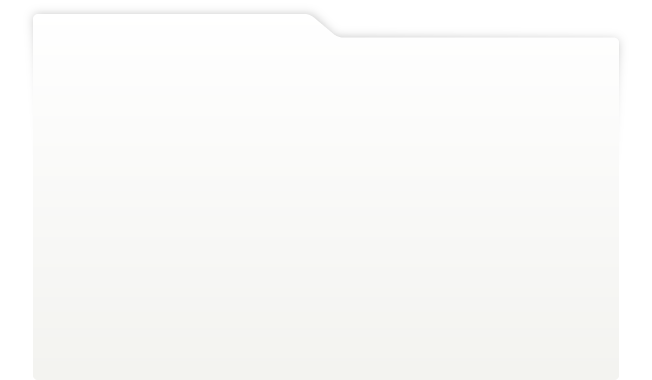
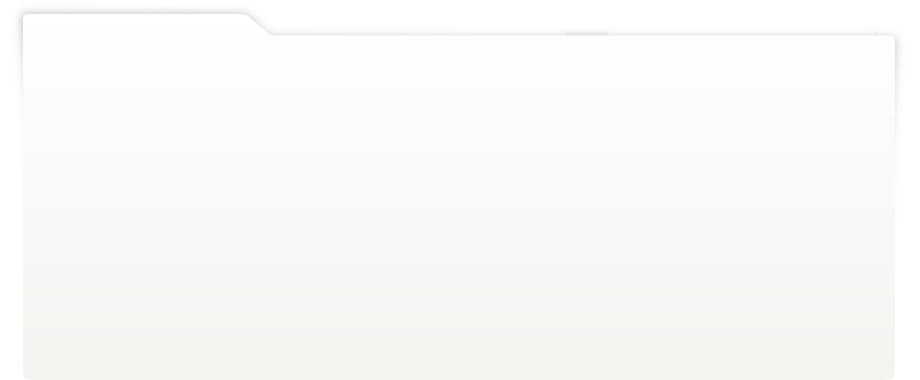
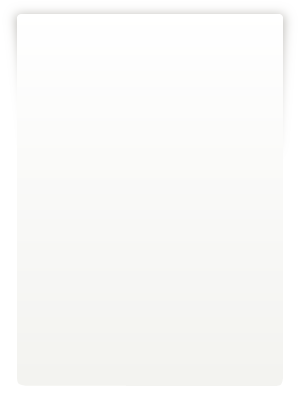
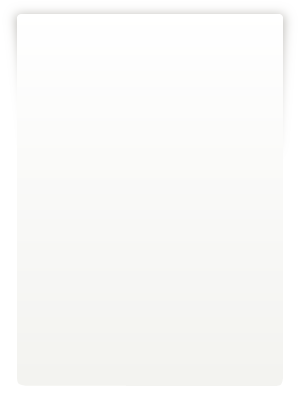
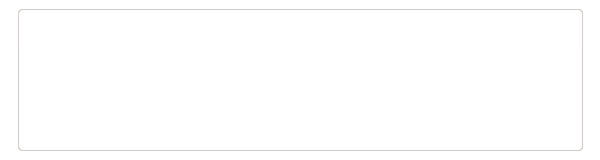
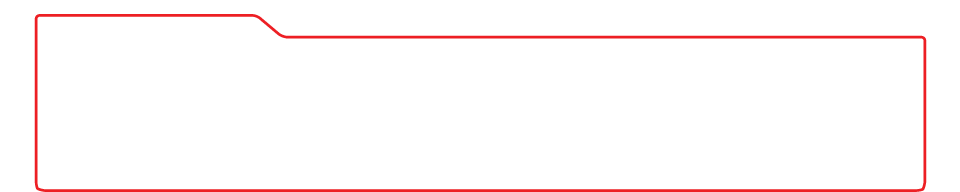
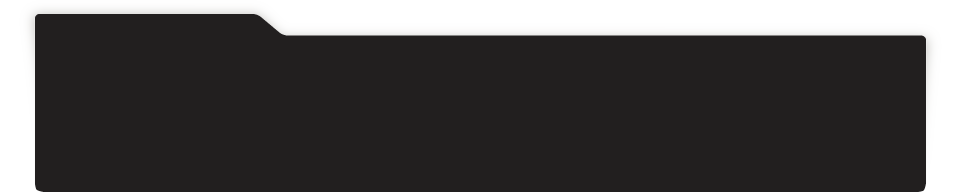
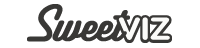
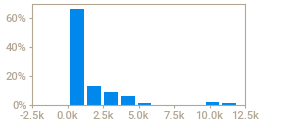
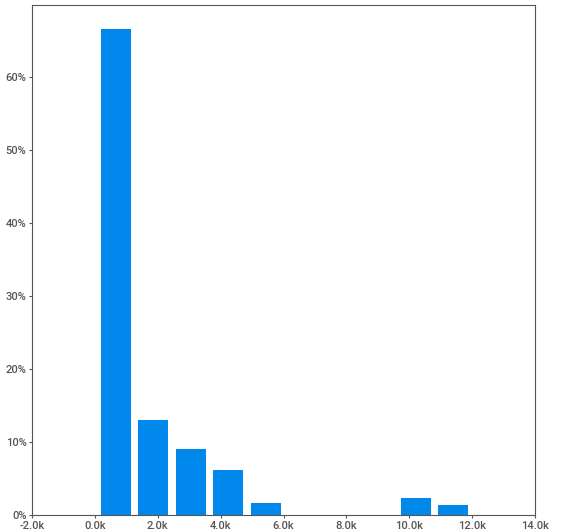
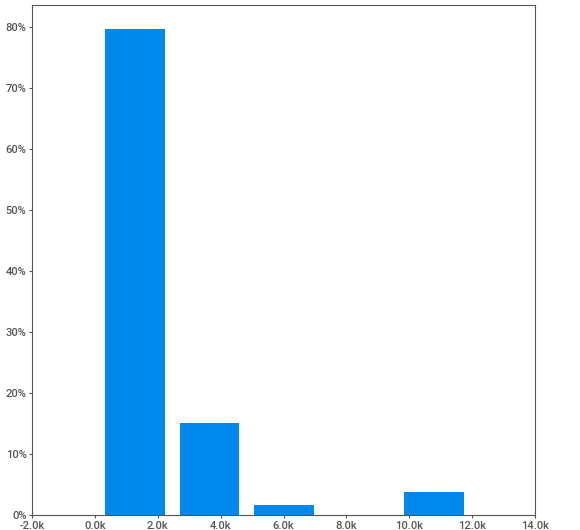
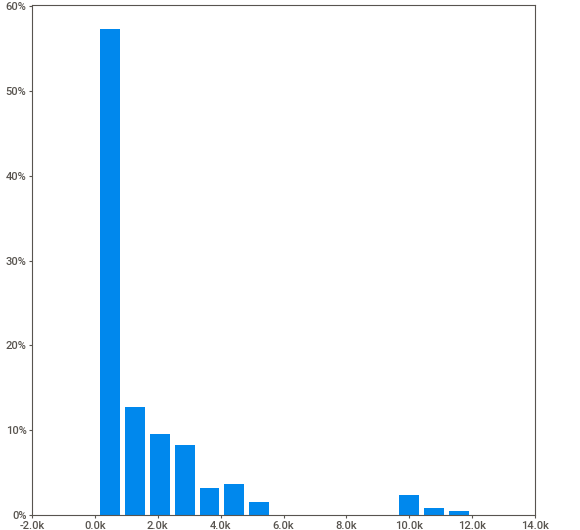
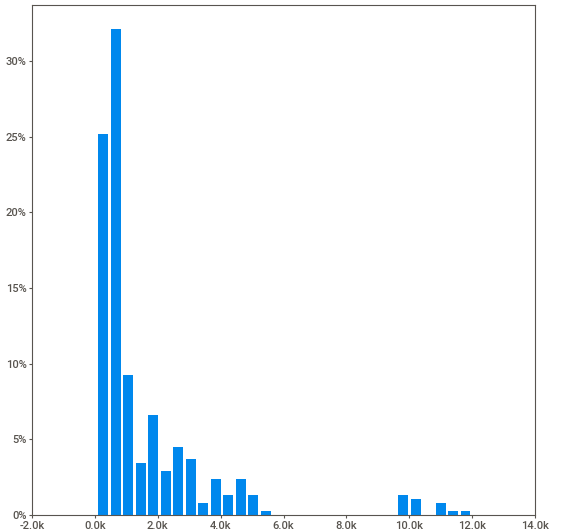
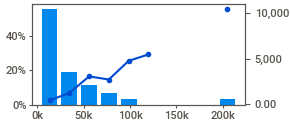
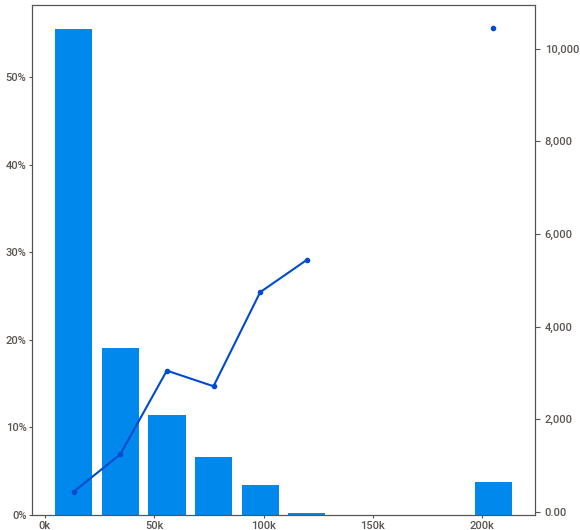
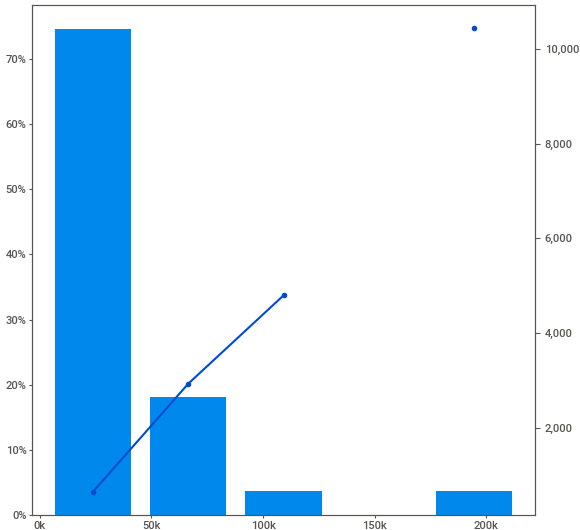
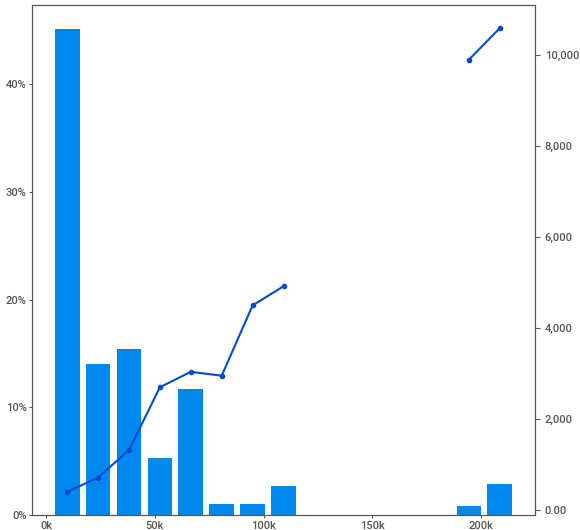
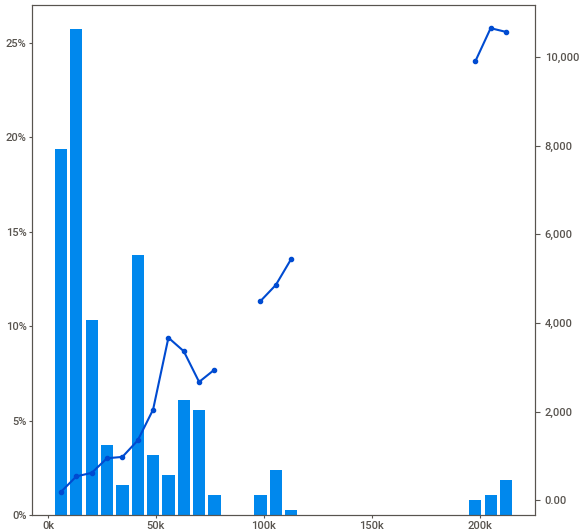
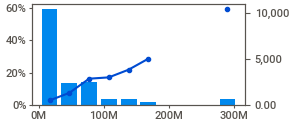
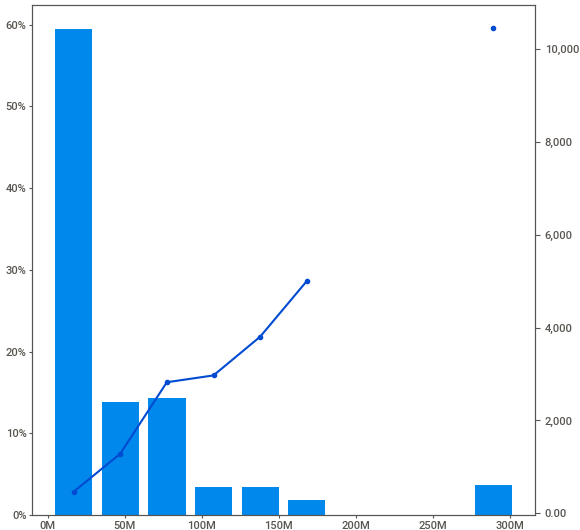
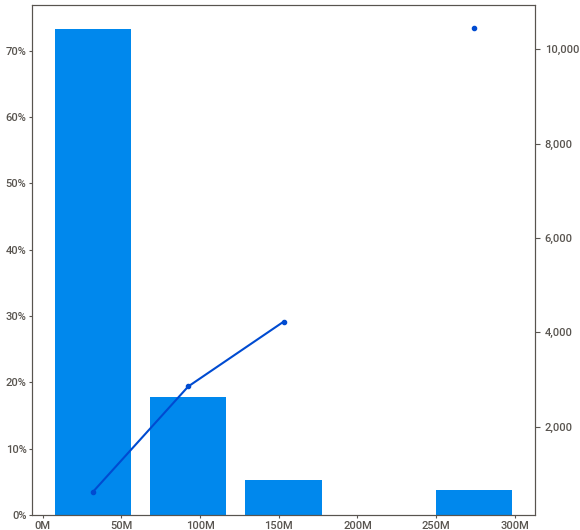
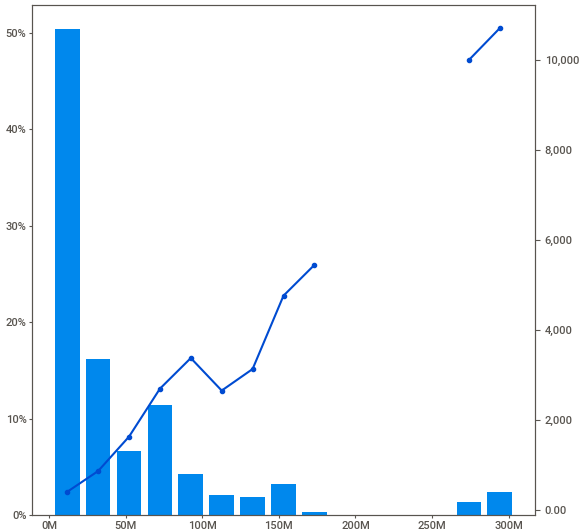
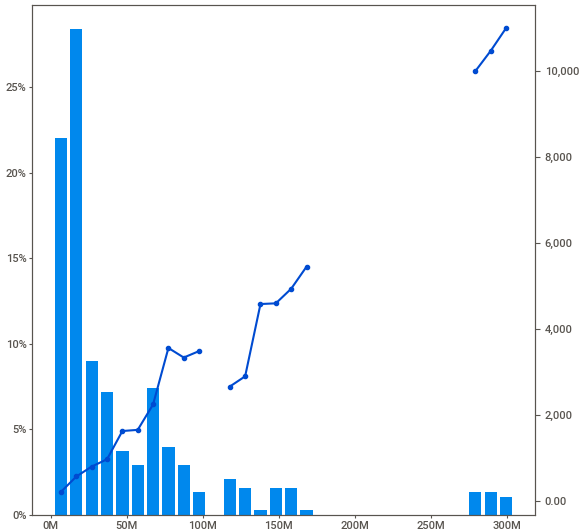
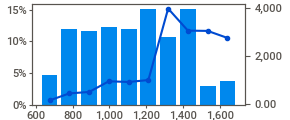
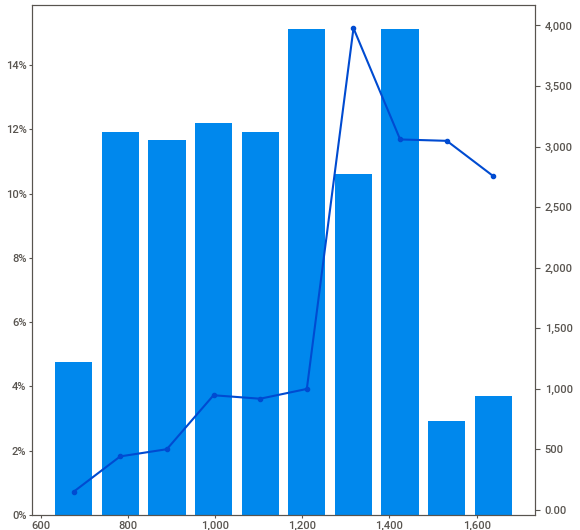
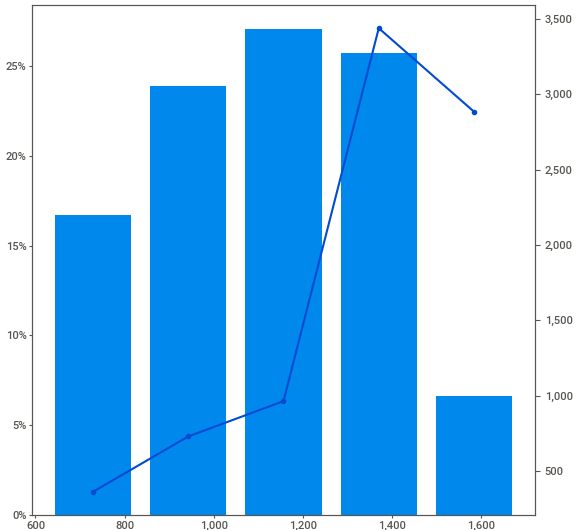
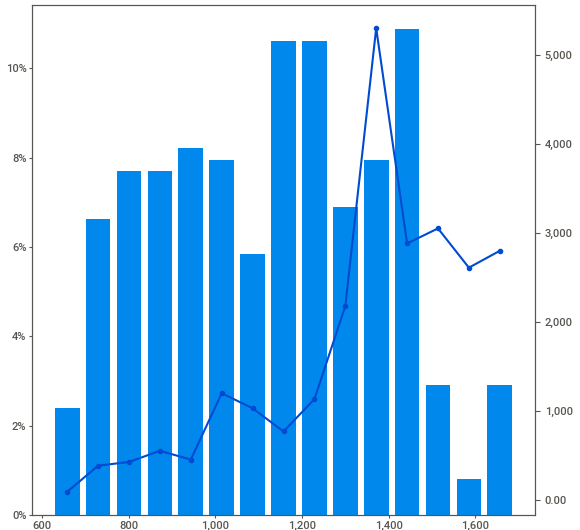
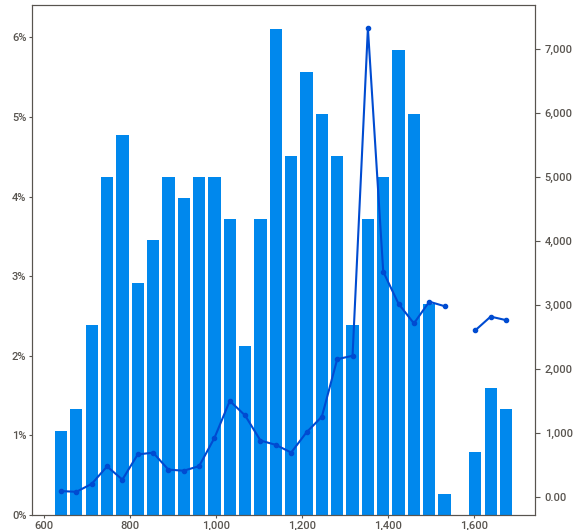
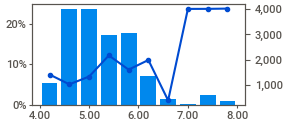
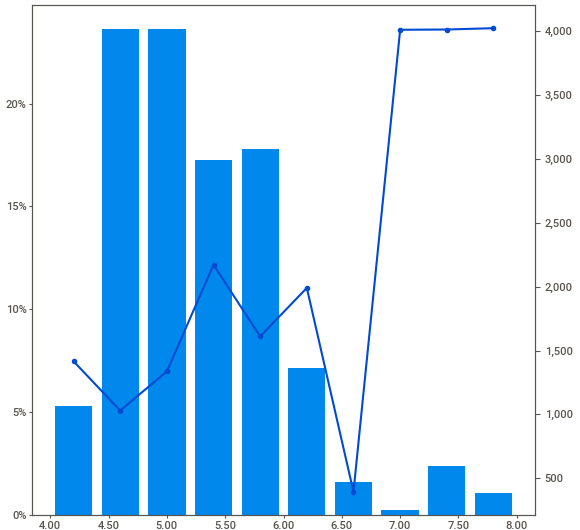
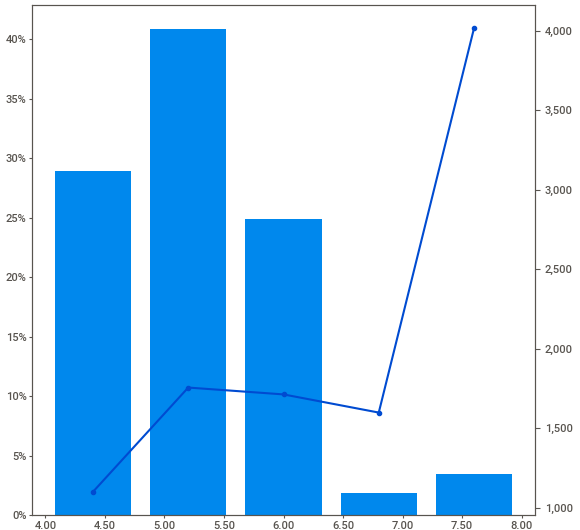
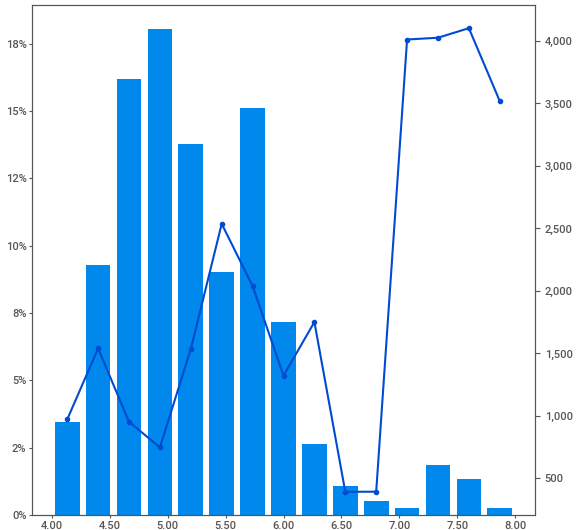
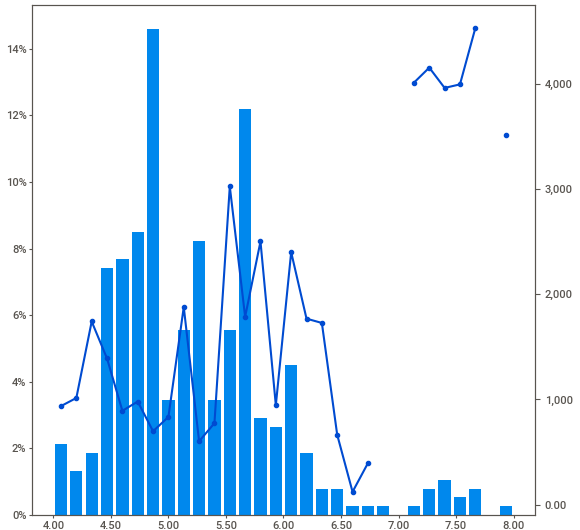
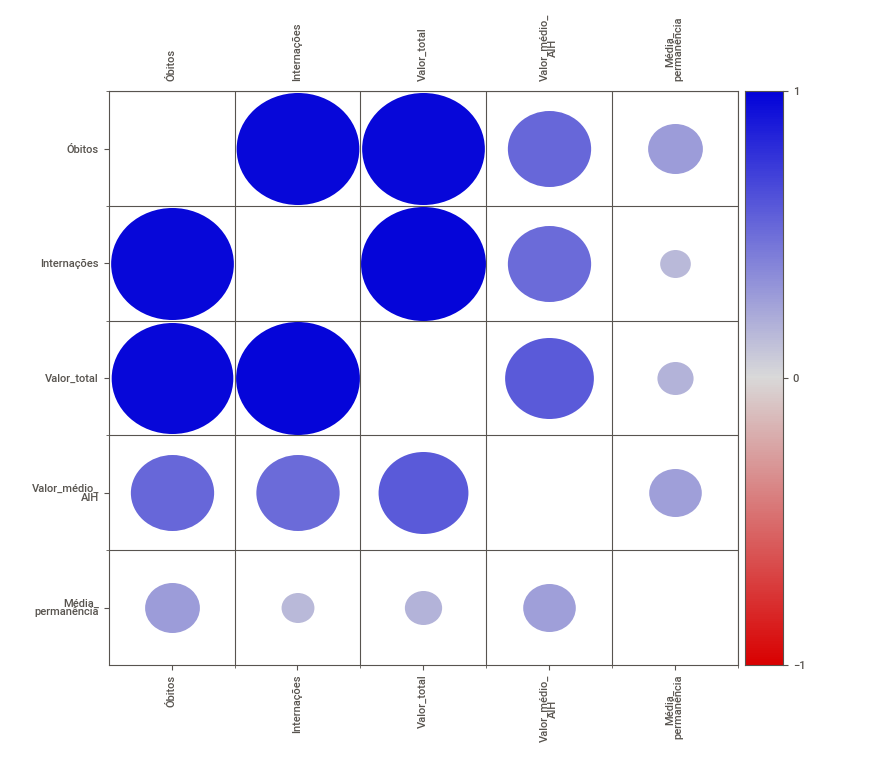
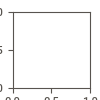

In [ ]:
# verificando se óbitos pode ser estimado baseado nas demais variáveis
sv_analise = sv.analyze(df2[colunas], target_feat='Óbitos')
sv_analise.show_notebook()

### Visualização dos gráficos das séries temporais

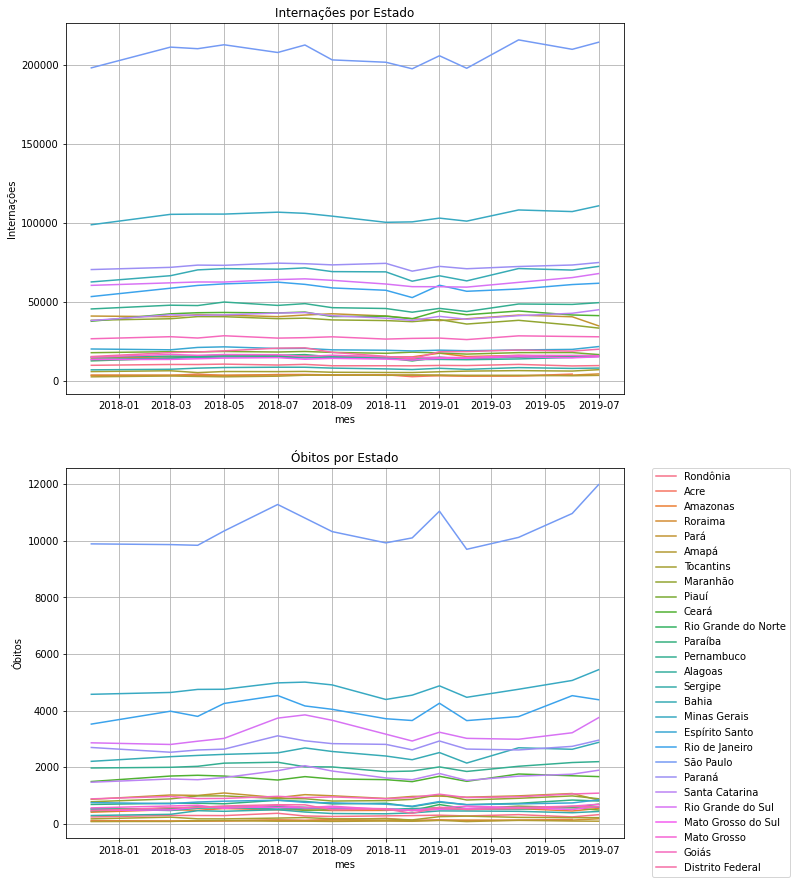

In [ ]:
# Gráfico com internações de cada estado
fig, axs = plt.subplots(figsize=(10,15), nrows=2)
axs[0].set_title('Internações por Estado')
axs[0].grid(axis='both')
sns.lineplot(data=df2, x='mes', y='Internações', hue='UF', ax = axs[0], legend=None)
axs[1].set_title('Óbitos por Estado')
axs[1].grid(axis='both')
sns.lineplot(data=df2, x='mes', y='Óbitos', hue='UF', ax = axs[1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# cria totais para internações e óbitos
df_totais = df2.groupby('mes')[['Internações', 'Óbitos', 'Valor_total']].sum()
df_totais['Valor_médio_AIH'] = df2.groupby('mes')[['Valor_médio_AIH']].mean()
df_totais

,Internações,Óbitos,Valor_total,Valor_médio_AIH
mes,,,,
2017-12-01,939601.0,38881.0,1.201828e+09,1109.117407
2018-03-01,994222.0,40490.0,1.249571e+09,1104.230000
2018-04-01,1006271.0,41111.0,1.265569e+09,1099.852222
2018-05-01,1018405.0,42508.0,1.279917e+09,1089.774815
2018-07-01,1014016.0,45595.0,1.301462e+09,1119.005185
2018-08-01,1020220.0,44550.0,1.316574e+09,1125.485926
2018-09-01,988931.0,42720.0,1.272479e+09,1122.482963
2018-11-01,968423.0,40078.0,1.254141e+09,1133.473704
2018-12-01,932863.0,39281.0,1.218271e+09,1139.331852


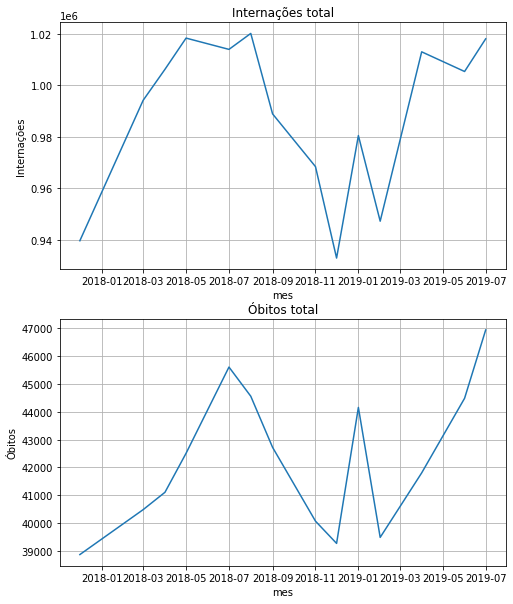

In [ ]:
# Gráfico com total de internações e de óbitos
fig, axs = plt.subplots(figsize=(8,10), nrows = 2)
axs[0].set_title('Internações total')
axs[0].grid(axis='both')
sns.lineplot(data=df_totais, x='mes', y='Internações', ax = axs[0])
axs[1].set_title('Óbitos total')
axs[1].grid(axis='both')
sns.lineplot(data=df_totais, x='mes', y='Óbitos', ax = axs[1])
plt.show()

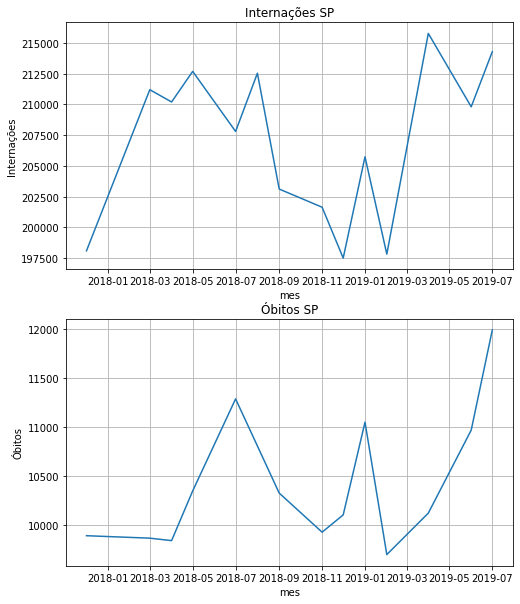

In [ ]:
# Gráfico com total de internações e óbitos para SP
fig, axs = plt.subplots(figsize=(8,10), nrows=2)
axs[0].set_title('Internações SP')
axs[0].grid(axis='both')
sns.lineplot(data=df2.loc['São Paulo'], x='mes', y='Internações', ax = axs[0])
axs[1].set_title('Óbitos SP')
axs[1].grid(axis='both')
sns.lineplot(data=df2.loc['São Paulo'], x='mes', y='Óbitos', ax = axs[1])
plt.show()

In [ ]:
# cria agregações por região
df_regiao = df2.groupby(['mes', 'Região'])['Internações', 'Óbitos'].sum()
df_regiao['Valor_médio_AIH'] = df2.groupby(['mes', 'Região'])['Valor_médio_AIH'].mean()
df_regiao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Internações   Óbitos  Valor_médio_AIH
mes        Região                                             
2017-12-01 Centro-Oeste      70277.0   2354.0      1121.825000
           Nordeste         249821.0   8859.0      1125.398889
           Norte             80359.0   1929.0       801.431429
           Sudeste          370247.0  18727.0      1335.867500
           Sul              168897.0   7012.0      1458.930000
...                              ...      ...              ...
2019-07-01 Centro-Oeste      78785.0   2965.0      1173.572500
           Nordeste         267944.0  10575.0      1166.798889
           Norte             75363.0   2149.0       864.730000
           Sudeste          408395.0  22652.0      1390.062500
           Sul              187638.0   8583.0      1539.490000

[70 rows x 3 columns]

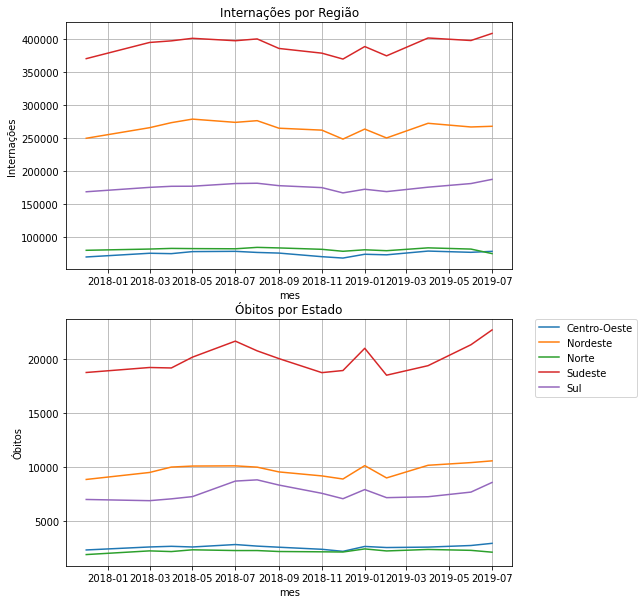

In [ ]:
# Gráfico com internações e óbitos de cada região
fig, axs = plt.subplots(figsize=(8,10), nrows=2)
axs[0].set_title('Internações por Região')
axs[0].grid(axis='both')
sns.lineplot(data=df_regiao, x='mes', y='Internações', hue='Região', ax = axs[0], legend=None)
axs[1].set_title('Óbitos por Região')
axs[1].grid(axis='both')
sns.lineplot(data=df_regiao, x='mes', y='Óbitos', hue='Região', ax = axs[1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Completando meses faltantes
Usando a amostra anterior e usando interpolação

In [ ]:
# completando série com valores da amostra anterior
df_totais.resample(rule='1MS').ffill()

,Internações,Óbitos,Valor_total,Valor_médio_AIH
mes,,,,
2017-12-01,939601.0,38881.0,1.201828e+09,1109.117407
2018-01-01,939601.0,38881.0,1.201828e+09,1109.117407
2018-02-01,939601.0,38881.0,1.201828e+09,1109.117407
2018-03-01,994222.0,40490.0,1.249571e+09,1104.230000
2018-04-01,1006271.0,41111.0,1.265569e+09,1099.852222
2018-05-01,1018405.0,42508.0,1.279917e+09,1089.774815
2018-06-01,1018405.0,42508.0,1.279917e+09,1089.774815
2018-07-01,1014016.0,45595.0,1.301462e+09,1119.005185
2018-08-01,1020220.0,44550.0,1.316574e+09,1125.485926


In [ ]:
# completando dados com valores interpolados entre os dados presentes.
df_out = df_totais.resample(rule='1MS').mean()
cols = ['Internações', 'Óbitos', 'Valor_total', 'Valor_médio_AIH']
df_out[cols] = df_out[cols].interpolate()
df_out

,Internações,Óbitos,Valor_total,Valor_médio_AIH
mes,,,,
2017-12-01,939601.0,38881.000000,1.201828e+09,1109.117407
2018-01-01,957808.0,39417.333333,1.217742e+09,1107.488272
2018-02-01,976015.0,39953.666667,1.233657e+09,1105.859136
2018-03-01,994222.0,40490.000000,1.249571e+09,1104.230000
2018-04-01,1006271.0,41111.000000,1.265569e+09,1099.852222
2018-05-01,1018405.0,42508.000000,1.279917e+09,1089.774815
2018-06-01,1016210.5,44051.500000,1.290690e+09,1104.390000
2018-07-01,1014016.0,45595.000000,1.301462e+09,1119.005185
2018-08-01,1020220.0,44550.000000,1.316574e+09,1125.485926


### Verificando comportamento das principais séries temporais

In [ ]:
import statsmodels.api as sm

# graficos decomponstos da série
def seasonal_decompose(ts, titulo=None):
  decomp = sm.tsa.seasonal_decompose(ts, model='additive', extrapolate_trend='freq')
  #fig = decomp.plot()
  #fig.set_size_inches(14,7)
  #fig.suptitle(titulo)
  #plt.show()
  return decomp

# imprime os gráficos de modo isolado
def plotseasonal(res, axes, title):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    axes[0].set_title(title)
    axes[0].grid()
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    axes[0].grid()
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    axes[0].grid()
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[0].grid()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


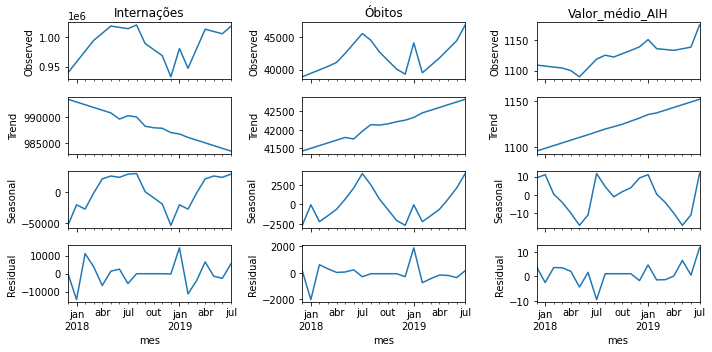

In [ ]:
#decompondo os gráficos de intenações e óbitos
features = ['Internações','Óbitos', 'Valor_médio_AIH']

fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(10,5))

for ax in range(3):
  feat = features[ax]
  res = seasonal_decompose(df_out[feat])
  plotseasonal(res, axes[:, ax], feat)

plt.tight_layout()
plt.show()


#seasonal_decompose(internacoes, 'Total de internações')
#seasonal_decompose(obitos, 'Total de óbitos')

### Modelagem para a série de Internações

In [ ]:
# Teste de adfuller para estacionaridade da série
# https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda/notebook
from statsmodels.tsa.stattools import adfuller
# funcao que verifica adfuller
def verifica_adfuller(ts):
  resultado = adfuller(ts, autolag='AIC')
  print('Estatistica de teste: ', resultado[0])
  print('p-valor: ', resultado[1])
  print('Valores Criticos: ', resultado[4])

# funcao que plota o média e desvios padrãos móveis
def verifica_media_dp(ts, janela, legenda_y):
  #Rolling statistics
  #rolmean = pd.rolling_mean(ts, window=janela)
  rolmean = ts.rolling(janela).mean()
  #rolstd = pd.rolling_std(ts, window=janela)
  rolstd = ts.rolling(janela).std()
  plt.figure(figsize=(15,10))
  orig = plt.plot(ts, color='red',label='Original')
  mean = plt.plot(rolmean, color='black', label='Média móvel')
  std = plt.plot(rolstd, color='green', label = 'DP móvel')
  plt.xlabel("Data")
  plt.ylabel(legenda_y)
  plt.title('Rolling Mean & Standard Deviation')
  plt.legend()
  plt.show()

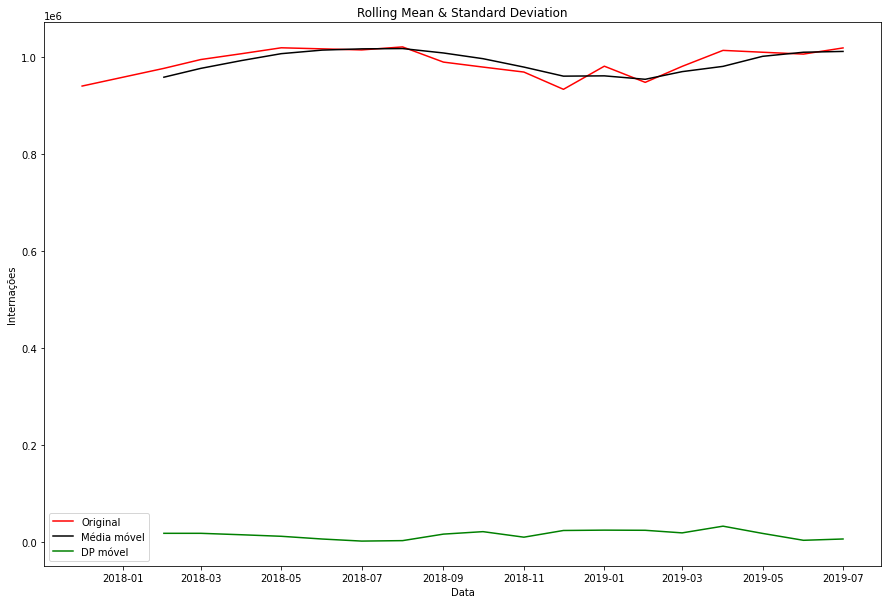

In [ ]:
internacoes = df_out['Internações']
obitos = df_out['Óbitos']
valor_medio_AIH = df_out['Valor_médio_AIH']
verifica_media_dp(internacoes, 3, 'Internações')

In [ ]:
verifica_adfuller(internacoes)

Estatistica de tese:  -3.9430194148281013
p-valor:  0.0017400967529240371
Valores Criticos:  {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}


Pelo teste rejeitamos H0 com 5% de significância, reforçado pelo baixo p-valor, podemos considerar a série estacionária

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


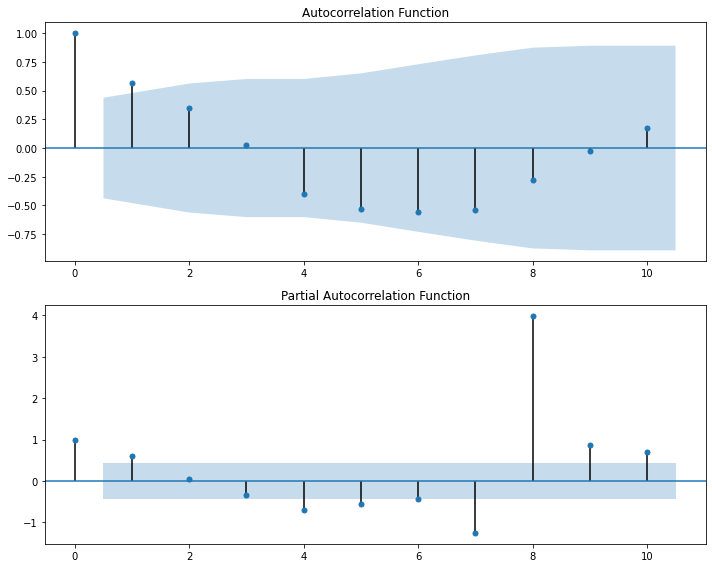

In [ ]:
#verificando modelo
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF
fig, axs = plt.subplots(2,1, figsize=(10,8))

plot_acf(internacoes, lags=10, ax = axs[0])
axs[0].set_title('Autocorrelation Function')

# PACF
plot_pacf(internacoes, lags=10, ax = axs[1])
axs[1].set_title('Partial Autocorrelation Function')
plt.tight_layout()


Vamos escolher q=0 e p=5, modelo AR(5)
Foi o modelo que apresentou o melhor score AIC, outras combinações também não conseguiram ajustar o modelo

In [ ]:
# ARIMA LIBRARY
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(internacoes, order=(4,0,0)) # (AR) = (4,0,0)
model_fit = model.fit()
print(model_fit.summary())

# predict
#start_index = datetime(2019, 8)
#end_index = datetime(2020, 1)
#forecast = model_fit.predict(start=start_index, end=end_index)


                              ARMA Model Results                              
Dep. Variable:            Internações   No. Observations:                   20
Model:                     ARMA(4, 0)   Log Likelihood                -220.542
Method:                       css-mle   S.D. of innovations          13583.162
Date:                ter, 04 jan 2022   AIC                            453.085
Time:                        03:18:09   BIC                            459.059
Sample:                    12-01-2017   HQIC                           454.251
                         - 07-01-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               9.86e+05   4369.868    225.639      0.000    9.77e+05    9.95e+05
ar.L1.Internações     0.3919      0.153      2.557      0.022       0.091       0.692
ar.L2.Internações     0.

In [ ]:
# fit model
model = ARIMA(internacoes, order=(5,0,0)) # (AR) = (5,0,0)
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Internações   No. Observations:                   20
Model:                     ARMA(5, 0)   Log Likelihood                -218.391
Method:                       css-mle   S.D. of innovations          11806.249
Date:                ter, 04 jan 2022   AIC                            450.782
Time:                        03:19:00   BIC                            457.752
Sample:                    12-01-2017   HQIC                           452.143
                         - 07-01-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.863e+05   2609.717    377.943      0.000    9.81e+05    9.91e+05
ar.L1.Internações     0.0462      0.202      0.229      0.822      -0.350       0.442
ar.L2.Internações     0.

### Previsões do modelo para Internações

In [ ]:
#forecast
forecast, se, conf = model_fit.forecast(steps=6)
print(forecast)

[992303.30089467 983610.92720061 977280.57362777 960448.58773361
 962097.46812366 968258.3841516 ]


<function matplotlib.pyplot.show>

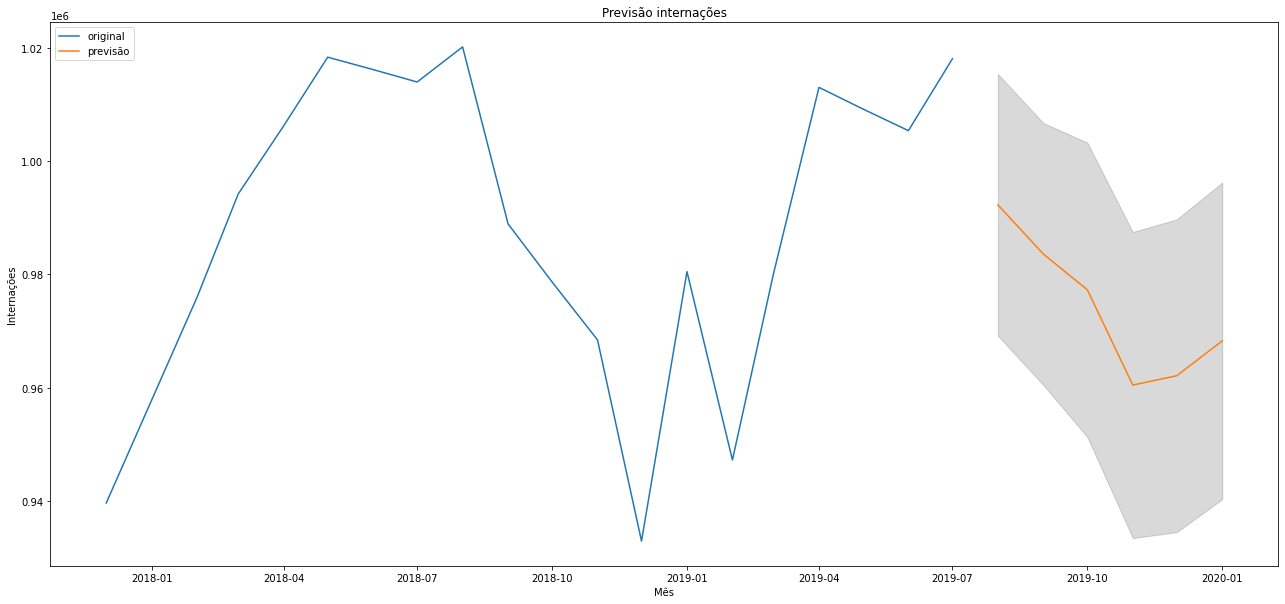

In [ ]:
#cria serie para os previstos
dateindex = pd.date_range(start=datetime(2019, 8, 1), end=datetime(2020, 1, 1), freq='1MS', name='mes')
forecast_series = pd.Series(forecast, index=dateindex)
lower_series = pd.Series(conf[:,0], index=dateindex)
upper_series = pd.Series(conf[:,1], index=dateindex)

# visualization
plt.figure(figsize=(22,10))
plt.plot(internacoes,label = "original")
plt.plot(forecast_series, label='previsão')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Previsão internações')
plt.legend(loc='upper left')
plt.xlabel('Mês')
plt.ylabel('Internações')
plt.show

### Testes para verificar possibilidade de usar o VAR para estimar os óbitos

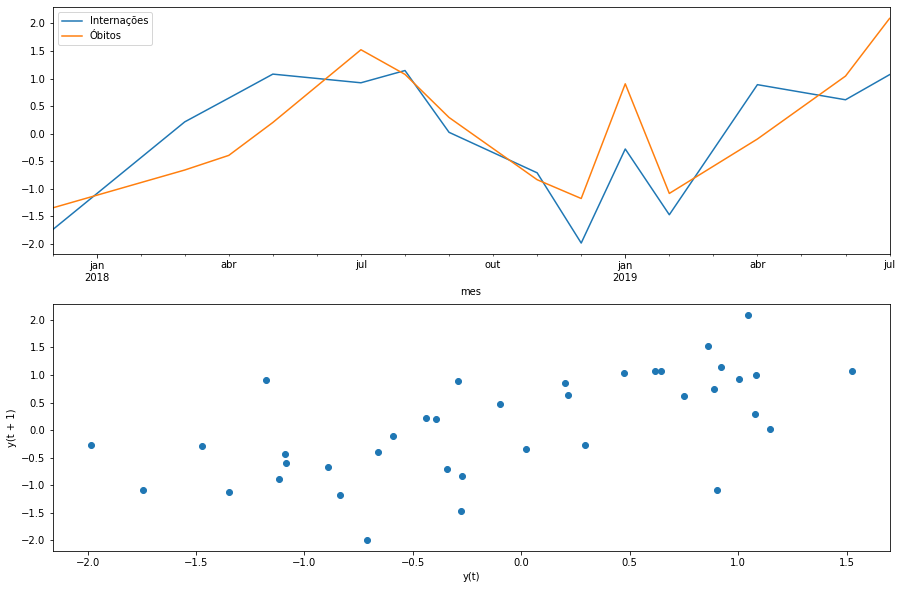

In [ ]:
# plotando as duas séries
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
df_out2 = df_out[['Internações', 'Óbitos']].copy()
df_out2['Internações'] = (df_out['Internações'] - df_out['Internações'].mean())/df_out['Internações'].std()
df_out2['Óbitos'] = (df_out['Óbitos'] - df_out['Óbitos'].mean())/df_out['Óbitos'].std()
df_out2.plot(ax=ax1)
pd.plotting.lag_plot(df_out2)

O gráfico de lags sugere uma fraca correlação linear. Foi usado os valores normalizados para ter um gráfico com escalas para melhor visualização
A seguir é feito o teste de causalidade

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=4
test = 'ssr_chi2test'

print("Y = Internações, X = Óbitos")
tr = grangercausalitytests(df_out[['Internações', 'Óbitos']], maxlag=maxlag, verbose=True)
print("\n\nY = Óbitos, X = Internações")
tr = grangercausalitytests(df_out[['Óbitos', 'Internações']], maxlag=maxlag, verbose=True)

Y = Internações, X = Óbitos

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3568  , p=0.2612  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=1.6112  , p=0.2043  , df=1
likelihood ratio test: chi2=1.5465  , p=0.2136  , df=1
parameter F test:         F=1.3568  , p=0.2612  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2202  , p=0.3269  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=3.3790  , p=0.1846  , df=2
likelihood ratio test: chi2=3.0966  , p=0.2126  , df=2
parameter F test:         F=1.2202  , p=0.3269  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4006  , p=0.7557  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=2.0431  , p=0.5635  , df=3
likelihood ratio test: chi2=1.9294  , p=0.5872  , df=3
parameter F test:         F=0.4006  , p=0.7557  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         

Pelo resultado acima, com 2 lags temos para o teste chi2 um p-valor de 0.0005 então Internações Grange causa Óbitos

In [ ]:
# teste de cointegração
from statsmodels.tsa.vector_ar.vecm import coint_johansen

out = coint_johansen(df_out[['Internações', 'Óbitos']],0,1)
traces = out.lr1
cvts = out.cvt[:, 1]
def adjust(val, length= 6): return str(val).ljust(length)
# Summary
print(adjust('Name',15), ':: ', adjust('Test Stat',9), ">",  adjust('C(95%)',8), '=>   Signif  \n', '--'*30)
for col, trace, cvt in zip(['Internações', 'Óbitos'], traces, cvts):
  print(adjust(col,15), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

Name            ::  Test Stat > C(95%)   =>   Signif  
 ------------------------------------------------------------
Internações     ::  19.37     > 15.4943   =>   True
Óbitos          ::  5.54      > 3.8415    =>   True


O teste de cointegração com constantes e d = 1 apresentou coeficientes para rejeitar a Hipótese nula de não cointegração

In [ ]:
# criando teste adfuller para verificar estacionaridade das séries:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# aplicando os testes de estacionaridade
# ADF Test on each column
for name, column in df_out[['Internações', 'Óbitos']].iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Internações" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.943
 No. Lags Chosen       = 4
 Critical value 1%     = -3.964
 Critical value 5%     = -3.085
 Critical value 10%    = -2.682
 => P-Value = 0.0017. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Óbitos" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8105
 No. Lags Chosen       = 8
 Critical value 1%     = -4.223
 Critical value 5%     = -3.189
 Critical value 10%    = -2.73
 => P-Value = 0.0568. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




A série de óbitos é não estacionária, então devemos aplicar a 1a diferenças

In [ ]:
# 1st difference
df_differenced = df_out[['Internações', 'Óbitos']].diff().dropna()

In [ ]:
# aplicando os testes de estacionaridade
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Internações" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9927
 No. Lags Chosen       = 4
 Critical value 1%     = -4.012
 Critical value 5%     = -3.104
 Critical value 10%    = -2.691
 => P-Value = 0.0356. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Óbitos" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.831
 No. Lags Chosen       = 0
 Critical value 1%     = -3.859
 Critical value 5%     = -3.042
 Critical value 10%    = -2.661
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




Nas primeiras diferenças as séries se mostraram estacionárias

### Criando o modelo VAR para estimar os óbitos

In [ ]:
# criando os dados para treino e teste
nobs = 4
df_train, df_test = df_differenced[0:-nobs], df_differenced[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(15, 2)
(4, 2)


In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
model = VAR(df_differenced)
for i in [1,2,3,4,5,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  34.852628184757805
BIC :  35.149418770723194
FPE :  1377306246733155.2
HQIC:  34.89355160462559 

Lag Order = 2
AIC :  35.02010929753515
BIC :  35.5102347940388
FPE :  1677213728299333.0
HQIC:  35.068828738446655 

Lag Order = 3
AIC :  35.24285745272931
BIC :  35.91887258468912
FPE :  2294741807498787.0
HQIC:  35.277474973671204 

Lag Order = 4
AIC :  35.293419790131885
BIC :  36.14308003145454
FPE :  3087099933799262.0
HQIC:  35.284369133215236 

Lag Order = 5
AIC :  33.232694299046884
BIC :  34.23692724558514
FPE :  811872341305743.1
HQIC:  33.13973418306146 

Lag Order = 7
AIC :  -93.36395747332253
BIC :  -92.15169084885252
FPE :  1.5472520616631815e-41
HQIC:  -93.8127820064959 

Lag Order = 8
AIC :  -93.70102707417766
BIC :  -92.47116895825543
FPE :  9.108461572719258e-43
HQIC:  -94.47628034337667 

Lag Order = 9
AIC :  -92.7894380788349
BIC :  -91.63961472545752
FPE :  2.6165677116559576e-43
HQIC:  -94.05079149495043 



Algum erro acontece com 5 lags

In [ ]:
# usando o select_order
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,35.00,35.09,1.579e+15,34.99
1,35.36,35.63,2.298e+15,35.33
2,35.53,35.98,2.870e+15,35.48
3,35.68,36.32,3.809e+15,35.62
4,35.36,36.18,3.682e+15,35.29
5,33.23*,34.24*,8.119e+14*,33.14*


Mesmo erro acontece com 5 lags, e 4 lags mostrou os melhores resultados para os scores

In [ ]:
# Treina o modelo
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           ter, 04, jan, 2022
Time:                     01:48:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    34.2369
Nobs:                     14.0000    HQIC:                   33.1397
Log likelihood:          -250.359    FPE:                8.11872e+14
AIC:                      33.2327    Det(Omega_mle):     2.54603e+14
--------------------------------------------------------------------
Results for equation Internações
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const               1470.270097      5017.801710            0.293           0.770
L1.Internações         0.043857         0.489694            0.090           0.929
L1.Óbitos             -3.325389         5.861918  

In [ ]:
# verifica correlação em série dos resíduos
# valores perto de 2 são o esperado
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(['Internações', 'Óbitos'], out):
    print(adjust(col), ':', round(val, 2))

Internações : 2.1
Óbitos : 1.73


### Prevendo os óbitos com o o modelo treinado

In [ ]:
# ordem do lag do modelo
lag_order = model_fitted.k_ar
print(lag_order)

# para o modelo prever precisa entrar com pelo menos lag_order observaçòes do passado
forecast_input = df_differenced.values[-lag_order:]
forecast_input

5


array([[32931.5,  1155. ],
       [32931.5,  1155. ],
       [-3824.5,  1335.5],
       [-3824.5,  1335.5],
       [12709. ,  2447. ]])

In [ ]:
# Forecast
dateindex = pd.date_range(start=datetime(2019, 8, 1), end=datetime(2020, 1, 1), freq='1MS', name='mes')
fc = model_fitted.forecast_interval(y=forecast_input, steps=6)
df_forecast = pd.DataFrame(fc[0], index=dateindex, columns=['Internações_1d', 'Óbitos_1d'])
df_forecast

,Internações_1d,Óbitos_1d
mes,,
2019-08-01,-40546.747643,-1724.916370
2019-09-01,16542.253453,-344.058542
2019-10-01,-43434.822598,-5935.376955
2019-11-01,-3719.766801,1096.882984
2019-12-01,6593.221428,1428.925587
2020-01-01,-17002.767397,-147.997663


In [ ]:
df_forecast_lower =  pd.DataFrame(fc[1], index=dateindex, columns=['Internações_1d', 'Óbitos_1d'])
df_forecast_lower

,Internações_1d,Óbitos_1d
mes,,
2019-08-01,-74889.275086,-3850.281393
2019-09-01,-18387.253459,-2843.489332
2019-10-01,-82935.672150,-9081.962334
2019-11-01,-45057.035438,-2133.599746
2019-12-01,-46023.624758,-2361.816484
2020-01-01,-81772.394398,-5349.183319


In [ ]:
df_forecast_upper =  pd.DataFrame(fc[2], index=dateindex, columns=['Internações_1d', 'Óbitos_1d'])
df_forecast_upper

,Internações_1d,Óbitos_1d
mes,,
2019-08-01,-6204.220200,400.448654
2019-09-01,51471.760366,2155.372249
2019-10-01,-3933.973046,-2788.791577
2019-11-01,37617.501836,4327.365713
2019-12-01,59210.067614,5219.667657
2020-01-01,47766.859603,5053.187993


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_forecast['Internações_previsto'] = df_out['Internações'].iloc[-1] + df_forecast['Internações_1d'].cumsum()
df_forecast['Óbitos_previsto'] = df_out['Óbitos'].iloc[-1] + df_forecast['Óbitos_1d'].cumsum()
df_forecast_lower['Internações_previsto'] = df_out['Internações'].iloc[-1] + df_forecast_lower['Internações_1d'].cumsum()
df_forecast_lower['Óbitos_previsto'] = df_out['Óbitos'].iloc[-1] + df_forecast_lower['Óbitos_1d'].cumsum()
df_forecast_upper['Internações_previsto'] = df_out['Internações'].iloc[-1] + df_forecast_upper['Internações_1d'].cumsum()
df_forecast_upper['Óbitos_previsto'] = df_out['Óbitos'].iloc[-1] + df_forecast_upper['Óbitos_1d'].cumsum()

In [ ]:
df_forecast

,Internações_1d,Óbitos_1d,Internações_previsto,Óbitos_previsto
mes,,,,
2019-08-01,-40546.747643,-1724.916370,977578.252357,45199.083630
2019-09-01,16542.253453,-344.058542,994120.505811,44855.025089
2019-10-01,-43434.822598,-5935.376955,950685.683213,38919.648134
2019-11-01,-3719.766801,1096.882984,946965.916411,40016.531117
2019-12-01,6593.221428,1428.925587,953559.137839,41445.456704
2020-01-01,-17002.767397,-147.997663,936556.370442,41297.459041


### Previsão de óbitos usando o modelo VAR com as variáveis Internações e óbitos

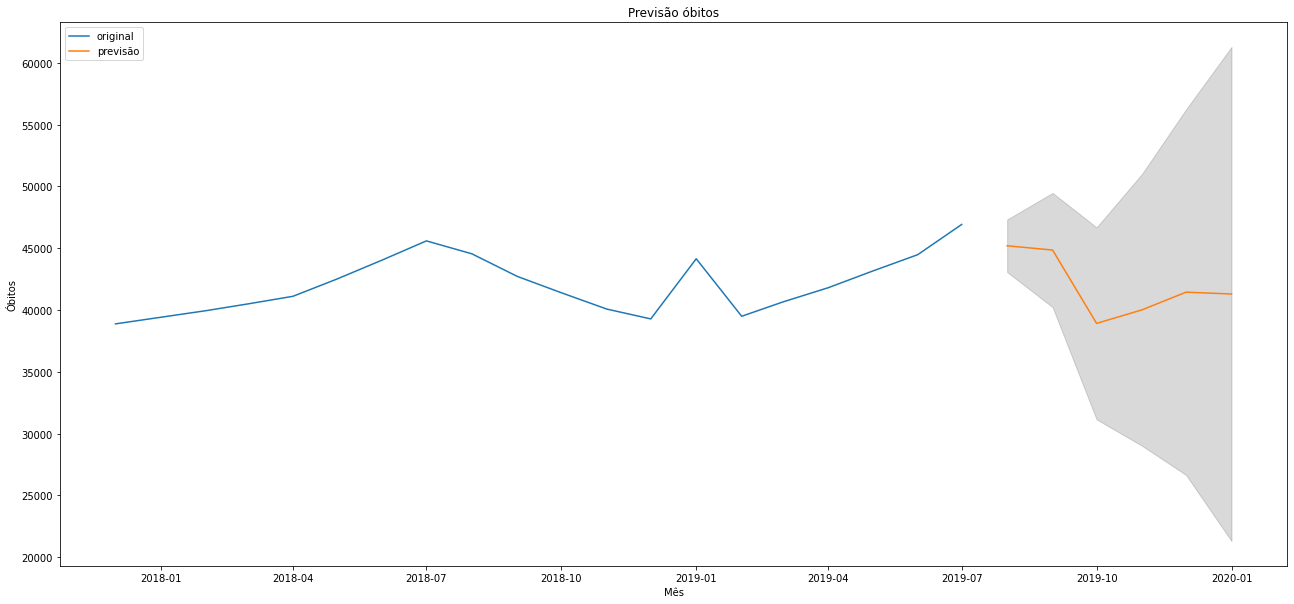

In [ ]:
# visualization
plt.figure(figsize=(22,10))
plt.plot(df_out['Óbitos'],label = "original")
plt.plot(df_forecast['Óbitos_previsto'], label='previsão')
plt.fill_between(df_forecast_lower.index, df_forecast_lower['Óbitos_previsto'], df_forecast_upper['Óbitos_previsto'], color='k', alpha=.15)
plt.title('Previsão óbitos')
plt.legend(loc='upper left')
plt.xlabel('Mês')
plt.ylabel('Óbitos')
plt.show()

### Usando modelo ARIMA para estimar valores para 'Valor_médio_AIH'

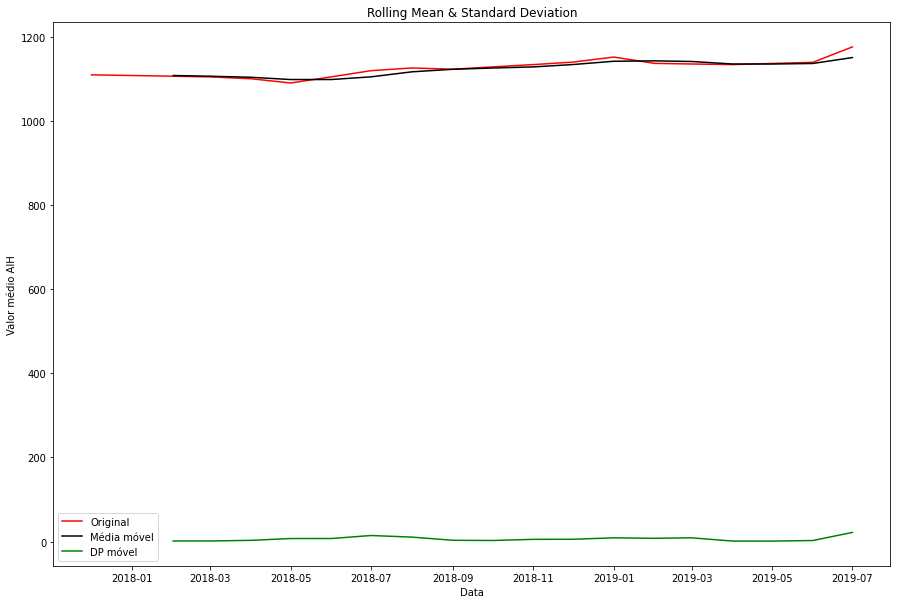

In [ ]:

verifica_media_dp(valor_medio_AIH, 3, 'Valor médio AIH')

Aparentemente a série apresenta estacionaridades, mas serão feito os testes

In [ ]:
verifica_adfuller(valor_medio_AIH)

Estatistica de tese:  0.15492562579058408
p-valor:  0.9696171302238505
Valores Criticos:  {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}


pelo resultado não rejeitamos H0 e portanto a série não é estacionária.

In [ ]:
valor_medio_AIH_1d = valor_medio_AIH.diff().dropna()
adfuller_test(valor_medio_AIH_1d, name='Valor médio AIH 1d')

    Augmented Dickey-Fuller Test on "Valor médio AIH 1d" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3856
 No. Lags Chosen       = 0
 Critical value 1%     = -3.859
 Critical value 5%     = -3.042
 Critical value 10%    = -2.661
 => P-Value = 0.1458. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [ ]:
valor_medio_AIH_2d = valor_medio_AIH_1d.diff().dropna()
adfuller_test(valor_medio_AIH_2d, name='Valor médio AIH 2d')

    Augmented Dickey-Fuller Test on "Valor médio AIH 2d" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 3.0877
 No. Lags Chosen       = 7
 Critical value 1%     = -4.332
 Critical value 5%     = -3.233
 Critical value 10%    = -2.749
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [ ]:
valor_medio_AIH_3d = valor_medio_AIH_2d.diff().dropna()
adfuller_test(valor_medio_AIH_3d, name='Valor médio AIH 3d')

    Augmented Dickey-Fuller Test on "Valor médio AIH 3d" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.7526
 No. Lags Chosen       = 6
 Critical value 1%     = -4.332
 Critical value 5%     = -3.233
 Critical value 10%    = -2.749
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


Mesmo com 3 diferenciações não se atingiu a estacionaridade, então vamos tentar diferenciando com sazonalidade


In [ ]:
valor_medio_AIH_saz = valor_medio_AIH.diff(periods=7).dropna()
adfuller_test(valor_medio_AIH_saz, name='Verificando sazionalidade')

    Augmented Dickey-Fuller Test on "Verificando sazionalidade" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.02
 No. Lags Chosen       = 4
 Critical value 1%     = -4.665
 Critical value 5%     = -3.367
 Critical value 10%    = -2.803
 => P-Value = 0.0013. Rejecting Null Hypothesis.
 => Series is Stationary.


Com sazonalidade 7 obteve-se uma série estacionária

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


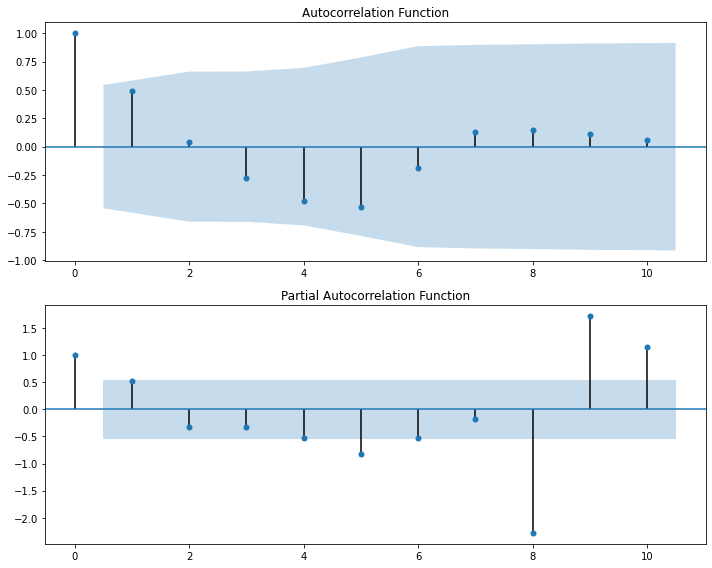

In [ ]:
# ACF
fig, axs = plt.subplots(2,1, figsize=(10,8))

plot_acf(valor_medio_AIH_saz, lags=10, ax = axs[0])
axs[0].set_title('Autocorrelation Function')

# PACF
plot_pacf(valor_medio_AIH_saz, lags=10, ax = axs[1])
axs[1].set_title('Partial Autocorrelation Function')
plt.tight_layout()


Um bom candidato será o modelo ARIMA(1,0,0)

In [ ]:
# fit model
model = ARIMA(valor_medio_AIH_saz, order=(4,0,0)) # (AR) = (4,0,0)
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:        Valor_médio_AIH   No. Observations:                   13
Model:                     ARMA(4, 0)   Log Likelihood                 -47.257
Method:                       css-mle   S.D. of innovations              8.094
Date:                ter, 04 jan 2022   AIC                            106.515
Time:                        04:27:58   BIC                            109.904
Sample:                    07-01-2018   HQIC                           105.818
                         - 07-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    24.5441      2.371     10.354      0.000      19.898      29.190
ar.L1.Valor_médio_AIH     0.8856      0.278      3.189      0.013       0.341       1.430
ar.L2.Va

### Treinando o modelo ARMA para previsão do valor médio de AIH

In [ ]:
# fit model
model = ARIMA(valor_medio_AIH_saz, order=(2,0,1)) # (AR) = (2,0,1) / melhor AIC
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:        Valor_médio_AIH   No. Observations:                   13
Model:                     ARMA(2, 1)   Log Likelihood                 -47.290
Method:                       css-mle   S.D. of innovations              7.837
Date:                ter, 04 jan 2022   AIC                            104.580
Time:                        04:28:33   BIC                            107.405
Sample:                    07-01-2018   HQIC                           104.000
                         - 07-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    24.4923      1.294     18.921      0.000      21.955      27.029
ar.L1.Valor_médio_AIH     1.3372      0.142      9.387      0.000       1.058       1.616
ar.L2.Va

### Gerando as previsões para o valor médio de AIH

In [ ]:
#forecast
forecast, se, conf = model_fit.forecast(steps=6)
print(forecast)

[45.15238183 42.49941144 31.52711577 19.04401198 11.40374149 11.48543348]


<function matplotlib.pyplot.show>

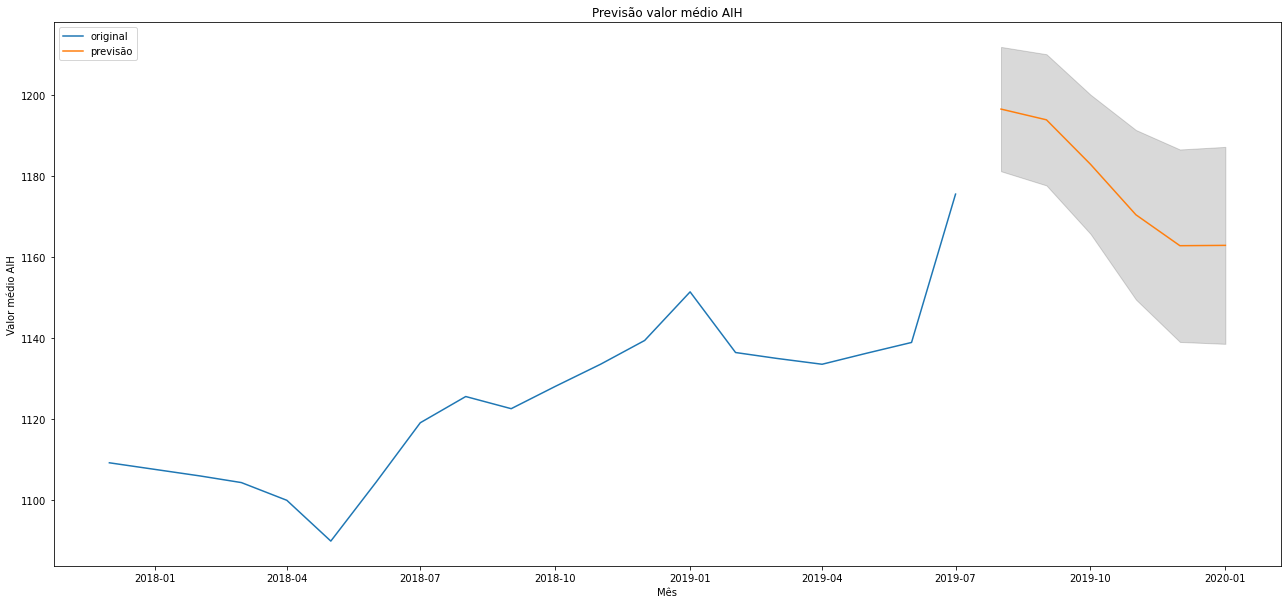

In [ ]:
#cria serie para os previstos
forecast_series = pd.Series(forecast + valor_medio_AIH.iloc[-7], index=dateindex)
lower_series = pd.Series(conf[:,0] + valor_medio_AIH.iloc[-7], index=dateindex)
upper_series = pd.Series(conf[:,1] + valor_medio_AIH.iloc[-7], index=dateindex)

# visualization
plt.figure(figsize=(22,10))
plt.plot(valor_medio_AIH,label = "original")
plt.plot(forecast_series, label='previsão')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Previsão valor médio AIH')
plt.legend(loc='upper left')
plt.xlabel('Mês')
plt.ylabel('Valor médio AIH')
plt.show

In [ ]:
#previsões Valor médio AIH
forecast_series

mes
2019-08-01    1196.493123
2019-09-01    1193.840152
2019-10-01    1182.867857
2019-11-01    1170.384753
2019-12-01    1162.744482
2020-01-01    1162.826174
Freq: MS, dtype: float64